In [1]:
import os
import glob
import json
import pymworks
import re
import datautils
import copy
import math
import time

import multiprocessing as mp
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import cPickle as pkl
from cPickle import PicklingError

from scipy import stats
import parse_behavior as pb

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/pymworks/protocol/__init__.py:15: UserWarning: networkx is required for pymworks.protocols.states
  warnings.warn('networkx is required for pymworks.protocols.states')
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/datautils/__init__.py:22: UserWarning: datautils.mongo failed to import with: No module named pymongo
  warnings.warn('datautils.mongo failed to import with: %s' % E)


In [2]:
%matplotlib notebook

## 1. Set sources and output dirs:

In [3]:
# Set path params:
root = '/n/coxfs01/behavior-data'
paradigm = 'threeport'

# Set all output dirs
cohort_dirs = [os.path.split(p)[0] for p in glob.glob(os.path.join(root, paradigm, 'cohort_data', 'A*', 'raw'))]
cohort_list = [re.search('(\D{2})', os.path.split(pf)[-1]).group(0) for pf in cohort_dirs]

for cohort in cohort_list:
    working_dir = os.path.join(root, paradigm, 'cohort_data', cohort)   
    output_dir = os.path.join(working_dir, 'processed')
    output_figdir = os.path.join(output_dir, 'figures')
    output_datadir = os.path.join(output_dir, 'data')
    if not os.path.exists(output_figdir): os.makedirs(output_figdir)
    if not os.path.exists(output_datadir): os.makedirs(output_datadir)


# 2. Set extraction info

In [4]:

# Set experiment parsing vars and params:
response_types = ['Announce_AcquirePort1', 'Announce_AcquirePort3', 'ignore']
outcome_types = outcome_types = ['success', 'ignore', 'failure']
ignore_flags = None


# 3. Load metadata

In [5]:
create_meta = False

#### Load metadata
meta_datafile = os.path.join(root, paradigm, 'metadata.pkl')
print(meta_datafile)

reload_meta = False
if os.path.exists(meta_datafile):
    print("Loading existing metadata...")
    with open(meta_datafile, 'rb') as f:
        metadata = pkl.load(f)
else:
    reload_meta = True

if create_meta or reload_meta:
    print("Creating new metadata...")
    ### All raw datafiles
    raw_fns = glob.glob(os.path.join(root, paradigm, 'cohort_data', 'A*', 'raw', '*.mwk'))

    #### Get all animals and sessions
    metadata = pd.concat([pd.DataFrame({'animalid': pb.parse_datafile_name(fn)[0],
                                      'session': int(pb.parse_datafile_name(fn)[1]),
                                      'datasource': fn, 
                                      'cohort': pb.parse_datafile_name(fn)[0][0:2]}, index=[i]) \
                                       for i, fn in enumerate(raw_fns)], axis=0)
    
    with open(meta_datafile, 'wb') as f:
        pkl.dump(metadata, f, protocol=pkl.HIGHEST_PROTOCOL)


/n/coxfs01/behavior-data/threeport/metadata.pkl
Loading existing metadata...


In [6]:
outdir = os.path.join(os.path.split(meta_datafile)[0], 'processed')
if not os.path.exists(outdir):
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/behavior-data/threeport/processed


###### 

In [90]:
reload(pb)

<module 'parse_behavior' from 'parse_behavior.py'>

### Test w. 1 

***********************************************
ANIMAL:  AG1
***********************************************
outfile: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed/data/AG1.pkl
False
[AG1]: Found 373 processed sessions.
[AG1]: There are 0 out of 205 found session datafiles to process.
[AG1] ~~~ processing complete! ~~~
-- making dataframe--
/n/coxfs01/behavior-data/threeport/processed/df_AG1.pkl
   depth_rotation light_position  outcome  response_time  rotation  size  \
0               0              0  failure       0.751851       0.0  30.0   
1               0              0  success       0.987852       0.0  30.0   
2               0              0  success       0.797415       0.0  30.0   
3               0              0  failure       0.460845       0.0  30.0   
4               0              0  success       0.671919       0.0  30.0   

           time   session  
0  708074867023  20150303  
1  708084647137  20150303  
2  708094077370  20150303  
3  708101541581  2

<IPython.core.display.Javascript object>


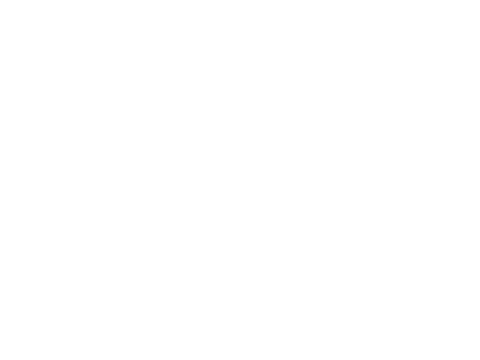

     animalid cohort                                         datasource  \
4248     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4248  20150203  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.6575342465753424), ('Blob_1_0', 0.5256410256410257)]


<IPython.core.display.Javascript object>


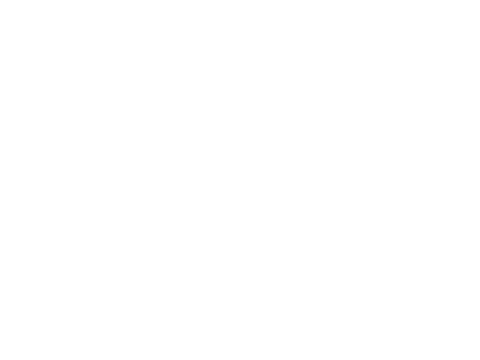

     animalid cohort                                         datasource  \
4249     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4249  20150204  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.8744186046511628), ('Blob_1_0', 0.11574074074074074)]


<IPython.core.display.Javascript object>


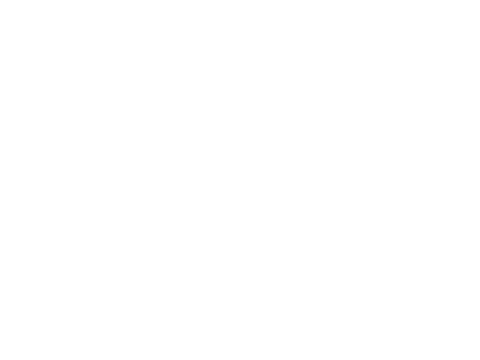

     animalid cohort                                         datasource  \
4250     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4250  20150206  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.5469255663430421), ('Blob_1_0', 0.5271565495207667)]


<IPython.core.display.Javascript object>


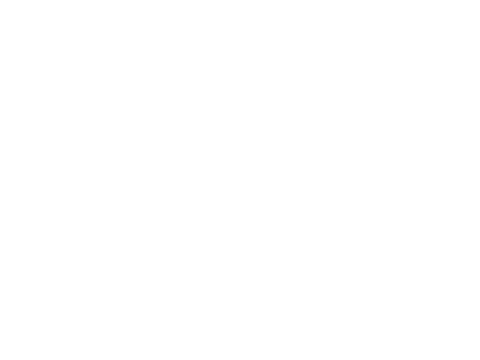

     animalid cohort                                         datasource  \
4251     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4251  20150209  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.5116279069767442), ('Blob_1_0', 0.6195652173913043)]


<IPython.core.display.Javascript object>


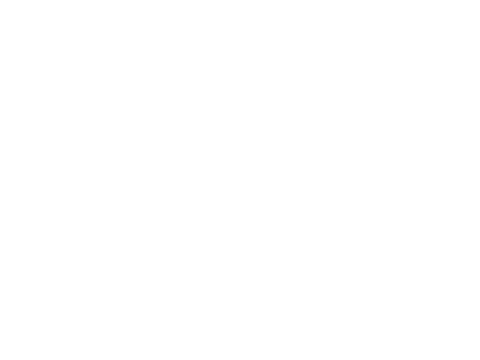

     animalid cohort                                         datasource  \
4252     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4252  20150210  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.43478260869565216), ('Blob_1_0', 0.7014388489208633)]


<IPython.core.display.Javascript object>


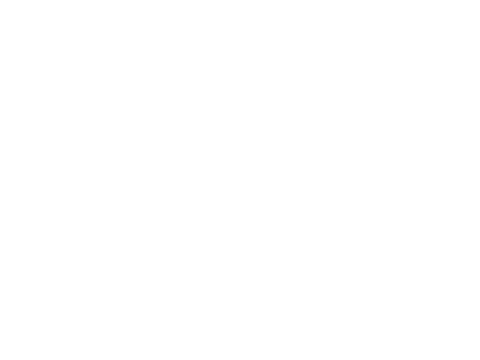

     animalid cohort                                         datasource  \
4253     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4253  20150211  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.31666666666666665), ('Blob_1_0', 0.8155339805825242)]


<IPython.core.display.Javascript object>


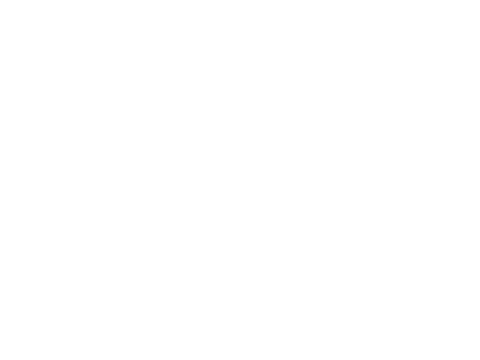

     animalid cohort                                         datasource  \
4254     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4254  20150212  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.33649289099526064), ('Blob_1_0', 0.8622222222222222)]


<IPython.core.display.Javascript object>


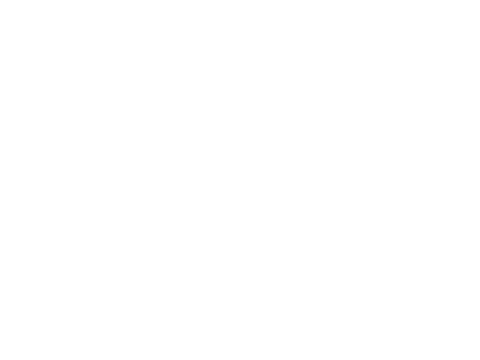

     animalid cohort                                         datasource  \
4255     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4255  20150213  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.2509505703422053), ('Blob_1_0', 0.8996763754045307)]


<IPython.core.display.Javascript object>


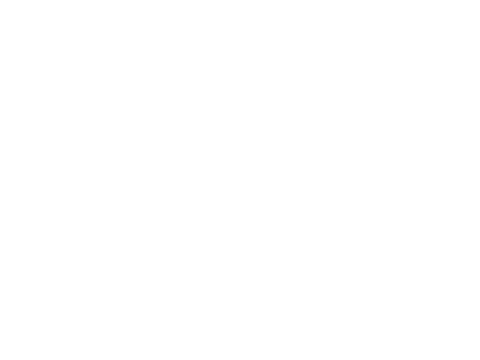

     animalid cohort                                         datasource  \
4256     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4256  20150216  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.22815533980582525), ('Blob_1_0', 0.9295774647887324)]


<IPython.core.display.Javascript object>


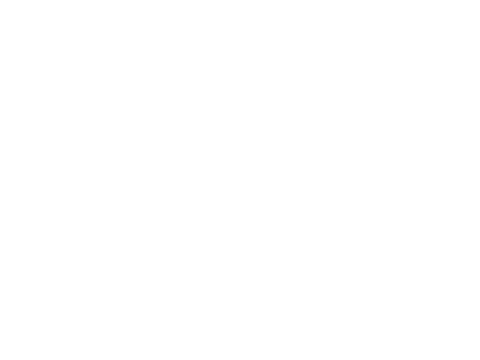

     animalid cohort                                         datasource  \
4257     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4257  20150217  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.14418604651162792), ('Blob_1_0', 0.9533898305084746)]


<IPython.core.display.Javascript object>


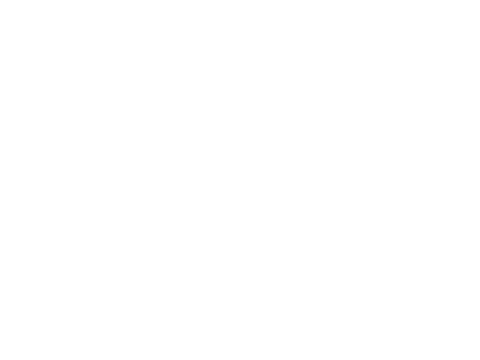

     animalid cohort                                         datasource  \
4258     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4258  20150218  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.2647058823529412), ('Blob_1_0', 0.9084158415841584)]


<IPython.core.display.Javascript object>


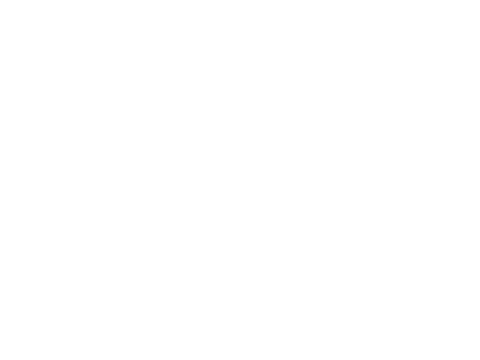

     animalid cohort                                         datasource  \
4259     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4259  20150219  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.4171974522292994), ('Blob_1_0', 0.8178694158075601)]


<IPython.core.display.Javascript object>


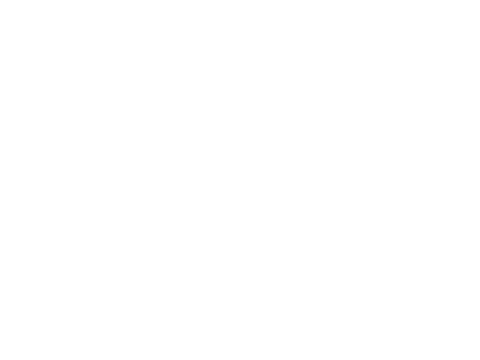

     animalid cohort                                         datasource  \
4260     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4260  20150220  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.5860058309037901), ('Blob_1_0', 0.6675257731958762)]


<IPython.core.display.Javascript object>


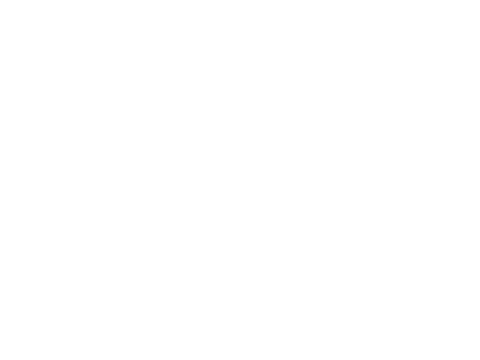

     animalid cohort                                         datasource  \
4261     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4261  20150223  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.4105263157894737), ('Blob_1_0', 0.7626262626262627)]


<IPython.core.display.Javascript object>


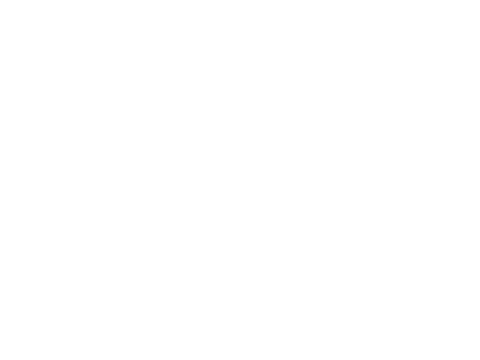

     animalid cohort                                         datasource  \
4262     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4262  20150225  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.5830508474576271), ('Blob_1_0', 0.6757679180887372)]


<IPython.core.display.Javascript object>


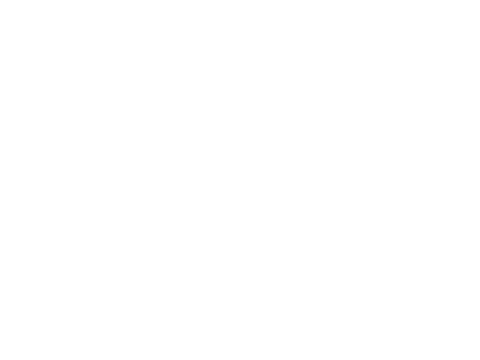

     animalid cohort                                         datasource  \
4263     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4263  20150226  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.5755813953488372), ('Blob_1_0', 0.6675392670157068)]


<IPython.core.display.Javascript object>


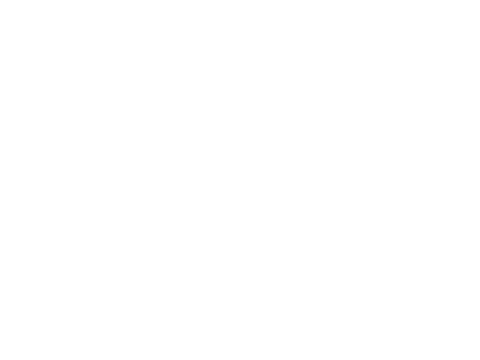

     animalid cohort                                         datasource  \
4264     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4264  20150227  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.521594684385382), ('Blob_1_0', 0.7092651757188498)]


<IPython.core.display.Javascript object>


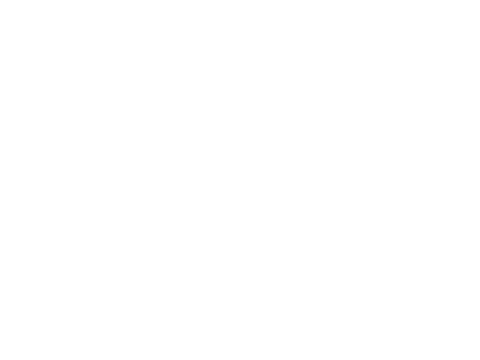

     animalid cohort                                         datasource  \
4265     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4265  20150303  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.5080213903743316), ('Blob_1_0', 0.7228260869565217)]


<IPython.core.display.Javascript object>


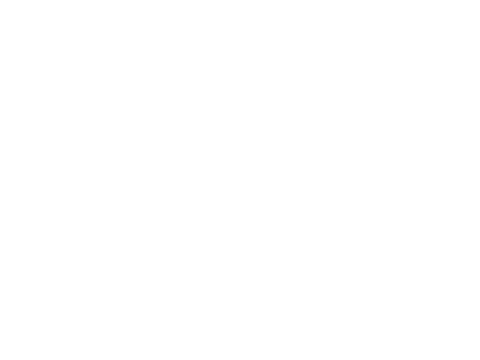

     animalid cohort                                         datasource  \
4266     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4266  20150304  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.4980694980694981), ('Blob_1_0', 0.7451737451737451)]


<IPython.core.display.Javascript object>


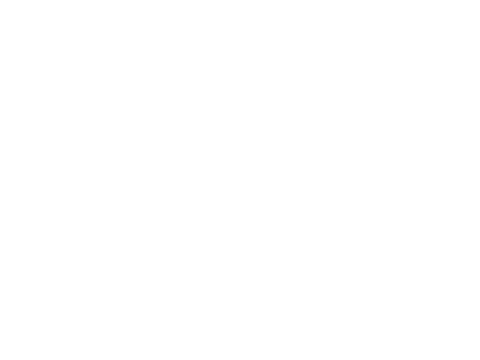

     animalid cohort                                         datasource  \
4267     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4267  20150305  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.5863095238095238), ('Blob_1_0', 0.6253521126760564)]


<IPython.core.display.Javascript object>


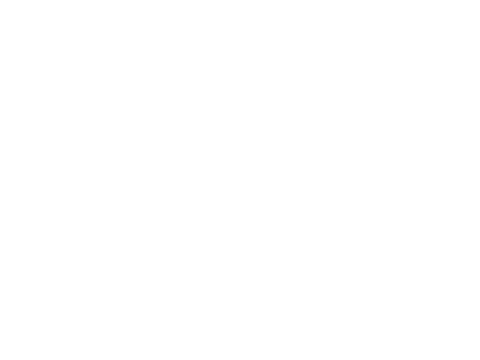

     animalid cohort                                         datasource  \
4268     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4268  20150306  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.5345911949685535), ('Blob_1_0', 0.6358024691358025)]


<IPython.core.display.Javascript object>


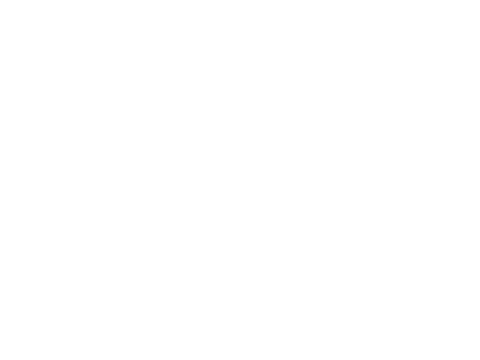

     animalid cohort                                         datasource  \
4269     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4269  20150309  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.6353591160220995), ('Blob_1_0', 0.6111111111111112)]


<IPython.core.display.Javascript object>


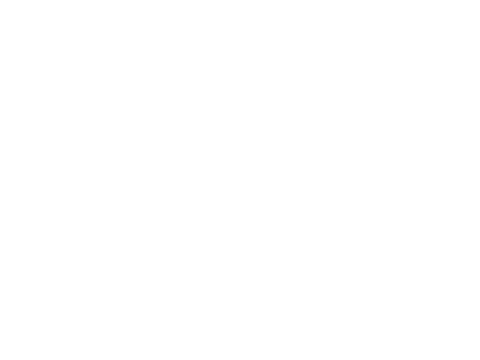

     animalid cohort                                         datasource  \
4270     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4270  20150311  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.6020761245674741), ('Blob_1_0', 0.6412698412698413)]


<IPython.core.display.Javascript object>


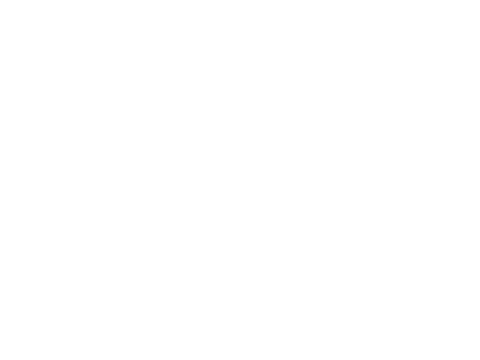

     animalid cohort                                         datasource  \
4271     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4271  20150313  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_2_0', 0.6744791666666666), ('Blob_1_0', 0.5828571428571429)]


<IPython.core.display.Javascript object>


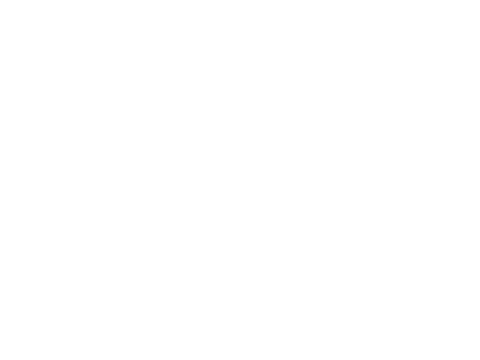

     animalid cohort                                         datasource  \
4272     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4272  20150314  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.32941176470588235), ('Blob_N1_y0', 0.823170731707317)]


<IPython.core.display.Javascript object>


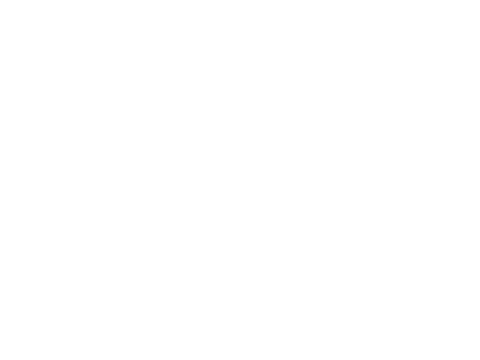

     animalid cohort                                         datasource  \
4273     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4273  20150316  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.4925925925925926), ('Blob_N1_y0', 0.7753623188405797)]


<IPython.core.display.Javascript object>


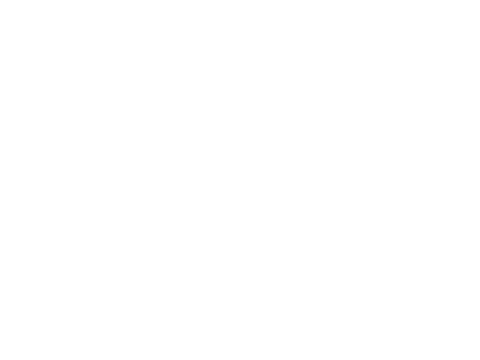

     animalid cohort                                         datasource  \
4274     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4274  20150324  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.46258503401360546), ('Blob_N1_y0', 0.7469135802469136)]


<IPython.core.display.Javascript object>


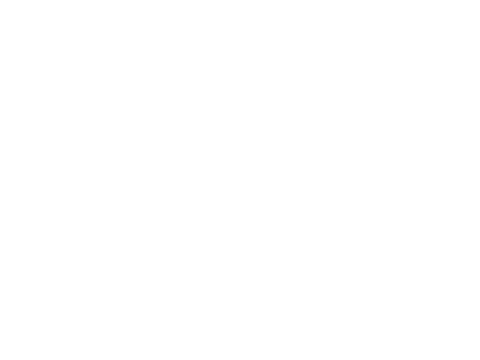

     animalid cohort                                         datasource  \
4275     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4275  20150325  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.2746478873239437), ('Blob_N1_y0', 0.8320610687022901)]


<IPython.core.display.Javascript object>


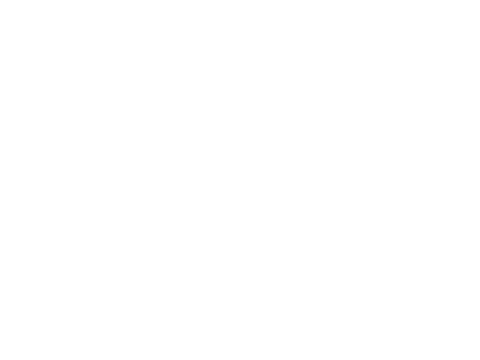

     animalid cohort                                         datasource  \
4276     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4276  20150326  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.4155844155844156), ('Blob_N1_y0', 0.7272727272727273)]


<IPython.core.display.Javascript object>


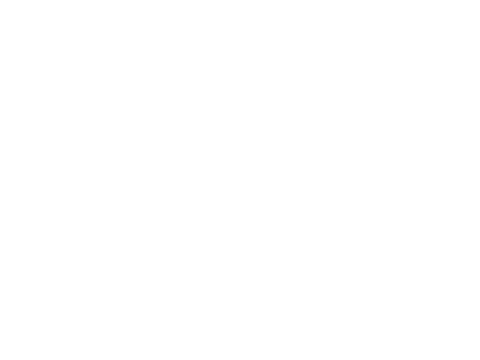

     animalid cohort                                         datasource  \
4277     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4277  20150327  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.4336734693877551), ('Blob_N1_y0', 0.7941176470588235)]


<IPython.core.display.Javascript object>


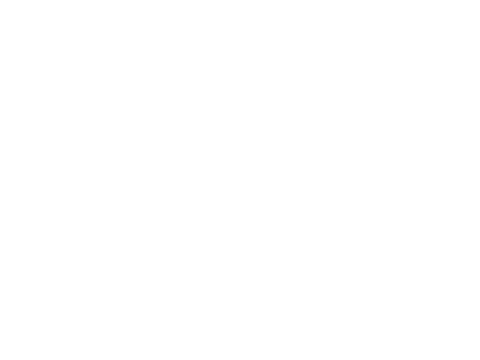

     animalid cohort                                         datasource  \
4278     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4278  20150330  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.5), ('Blob_N1_y0', 0.6896551724137931)]


<IPython.core.display.Javascript object>


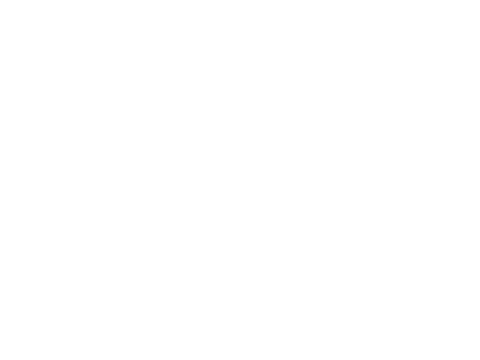

     animalid cohort                                         datasource  \
4279     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4279  20150401  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.6076555023923444), ('Blob_N1_y0', 0.591743119266055)]


<IPython.core.display.Javascript object>


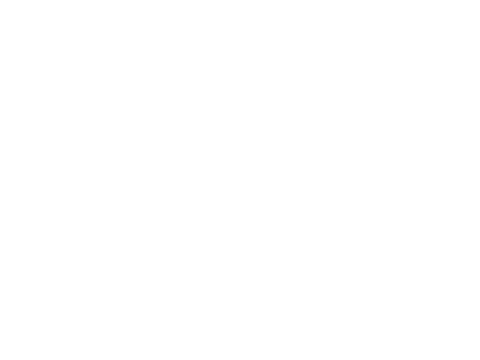

     animalid cohort                                         datasource  \
4280     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4280  20150402  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.5769230769230769), ('Blob_N1_y0', 0.7180616740088106)]


<IPython.core.display.Javascript object>


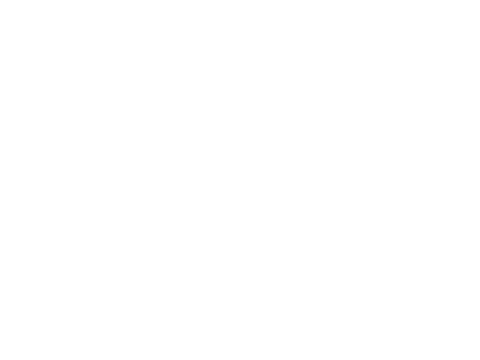

     animalid cohort                                         datasource  \
4281     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4281  20150421  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.7610062893081762), ('Blob_N1_y0', 0.5486111111111112)]


<IPython.core.display.Javascript object>


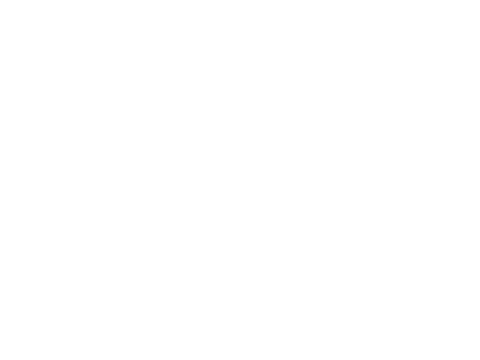

     animalid cohort                                         datasource  \
4282     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4282  20150422  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.64375), ('Blob_N1_y0', 0.4885057471264368)]


<IPython.core.display.Javascript object>


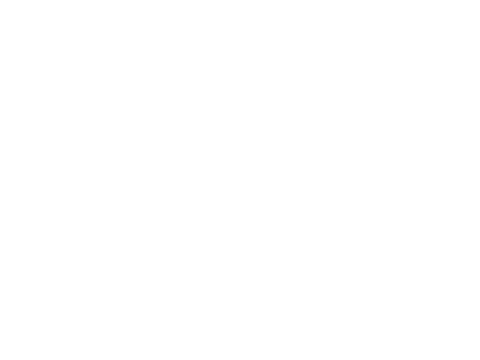

     animalid cohort                                         datasource  \
4283     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4283  20150423  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.3288590604026846), ('Blob_N1_y0', 0.803030303030303)]


<IPython.core.display.Javascript object>


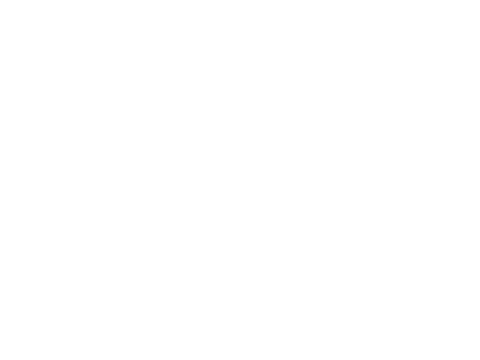

     animalid cohort                                         datasource  \
4284     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4284  20150424  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y0', 0.6617647058823529), ('Blob_N1_y0', 0.49230769230769234)]


<IPython.core.display.Javascript object>


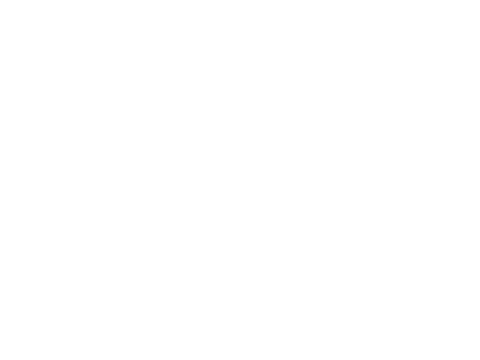

     animalid cohort                                         datasource  \
4285     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4285  20150428  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N1_y5', 0.8108108108108109), ('Blob_N2_y15', 0.3333333333333333), ('Blob_N2_y10', 0.21739130434782608), ('Blob_N1_y0', 0.8333333333333334), ('Blob_N2_y5', 0.36585365853658536), ('Blob_N2_y0', 0.46511627906976744), ('Blob_N1_y15', 0.75), ('Blob_N1_y10', 0.9230769230769231)]


<IPython.core.display.Javascript object>


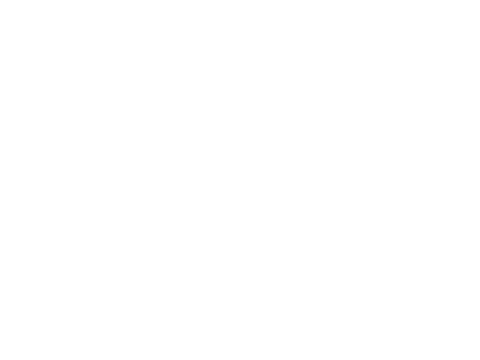

     animalid cohort                                         datasource  \
4286     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4286  20150429  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N1_y5', 0.6363636363636364), ('Blob_N2_y15', 0.5384615384615384), ('Blob_N2_y10', 0.4857142857142857), ('Blob_N1_y0', 0.7333333333333333), ('Blob_N2_y5', 0.48936170212765956), ('Blob_N2_y0', 0.3974358974358974), ('Blob_N1_y20', 0.6), ('Blob_N2_y20', 0.4), ('Blob_N1_y15', 0.5625), ('Blob_N1_y10', 0.7586206896551724)]


<IPython.core.display.Javascript object>


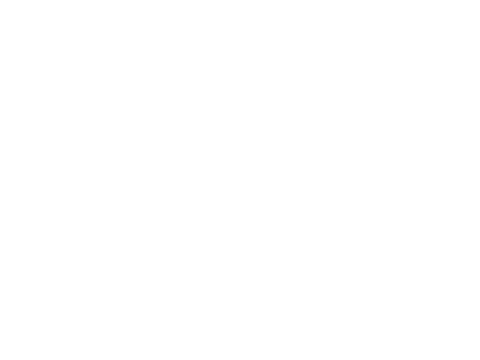

     animalid cohort                                         datasource  \
4287     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4287  20150501  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N1_y35', 0.8), ('Blob_N1_y5', 0.6730769230769231), ('Blob_N2_y15', 0.6363636363636364), ('Blob_N2_y10', 0.5609756097560976), ('Blob_N1_y0', 0.75), ('Blob_N2_y30', 0.6666666666666666), ('Blob_N2_y5', 0.5384615384615384), ('Blob_N2_y25', 0.7083333333333334), ('Blob_N1_y25', 0.5555555555555556), ('Blob_N2_y0', 0.6595744680851063), ('Blob_N1_y30', 0.6), ('Blob_N1_y20', 0.7272727272727273), ('Blob_N2_y20', 0.6857142857142857), ('Blob_N1_y15', 0.5), ('Blob_N1_y10', 0.5714285714285714), ('Blob_N2_y35', 0.8)]


<IPython.core.display.Javascript object>


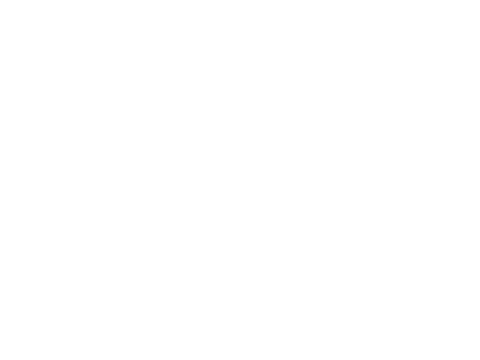

     animalid cohort                                         datasource  \
4288     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4288  20150506  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N1_y5', 0.5), ('Blob_N1_y0', 1.0), ('Blob_N2_y5', 0.5), ('Blob_N1_y35', 0.45454545454545453), ('Blob_N2_y50', 0.7619047619047619), ('Blob_N2_y55', 0.7), ('Blob_N2_y15', 1.0), ('Blob_N2_y10', 1.0), ('Blob_N2_y30', 0.7), ('Blob_N1_y50', 0.6923076923076923), ('Blob_N1_y30', 0.5833333333333334), ('Blob_N1_y55', 0.6428571428571429), ('Blob_N1_y15', 0.0), ('Blob_N2_y35', 0.8), ('Blob_N2_y40', 0.7142857142857143), ('Blob_N2_y45', 0.75), ('Blob_N1_y45', 0.5), ('Blob_N1_y60', 0.8333333333333334), ('Blob_N2_y60', 0.5789473684210527), ('Blob_N1_y40', 0.5833333333333334), ('Blob_N2_y25', 0.8), ('Blob_N1_y25', 0.5), ('Bl

<IPython.core.display.Javascript object>


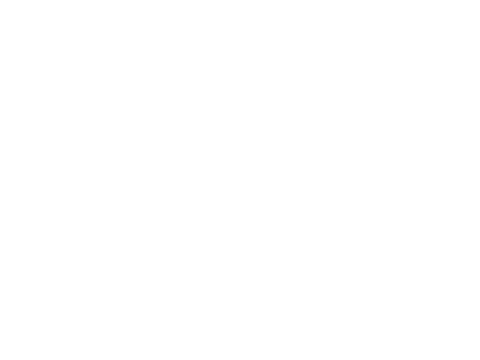

     animalid cohort                                         datasource  \
4289     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4289  20150507  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y40', 1.0), ('Blob_N2_y50', 0.9354838709677419), ('Blob_N2_y45', 0.6666666666666666), ('Blob_N1_y55', 0.4090909090909091), ('Blob_N2_y55', 0.9038461538461539), ('Blob_N1_y45', 0.6153846153846154), ('Blob_N1_y5', 0.0), ('Blob_N2_y60', 0.7948717948717948), ('Blob_N1_y40', 0.7777777777777778), ('Blob_N1_y35', 0.25), ('Blob_N2_y25', 1.0), ('Blob_N1_y50', 0.39285714285714285), ('Blob_N1_y30', 0.4), ('Blob_N1_y20', 1.0), ('Blob_N2_y20', 1.0), ('Blob_N1_y15', 0.3333333333333333), ('Blob_N1_y25', 0.4), ('Blob_N2_y30', 0.75), ('Blob_N1_y60', 0.4222222222222222)]


<IPython.core.display.Javascript object>


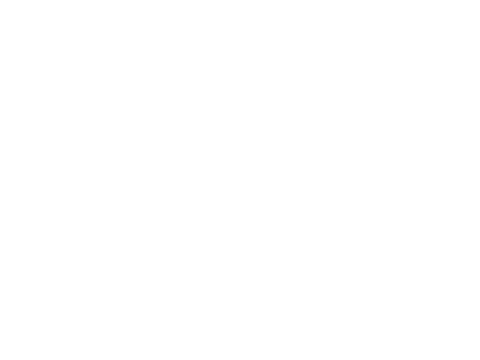

     animalid cohort                                         datasource  \
4290     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4290  20150508  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y40', 0.5454545454545454), ('Blob_N2_y50', 0.6666666666666666), ('Blob_N2_y15', 1.0), ('Blob_N2_y45', 0.896551724137931), ('Blob_N1_y55', 0.6428571428571429), ('Blob_N2_y55', 0.6857142857142857), ('Blob_N1_y45', 0.6153846153846154), ('Blob_N1_y5', 1.0), ('Blob_N2_y60', 0.8095238095238095), ('Blob_N1_y40', 0.7272727272727273), ('Blob_N2_y10', 1.0), ('Blob_N1_y35', 0.8), ('Blob_N2_y25', 0.6666666666666666), ('Blob_N1_y50', 0.5714285714285714), ('Blob_N1_y30', 1.0), ('Blob_N1_y20', 1.0), ('Blob_N2_y20', 1.0), ('Blob_N1_y25', 1.0), ('Blob_N2_y30', 0.3333333333333333), ('Blob_N1_y60', 0.4782608695652174), ('Bl

<IPython.core.display.Javascript object>


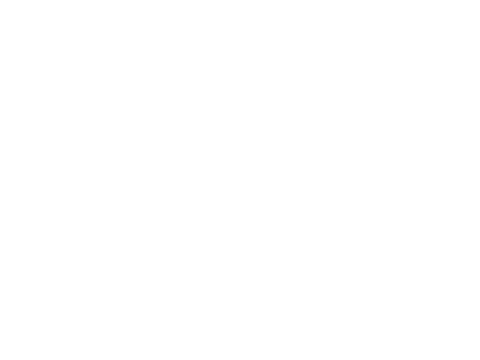

     animalid cohort                                         datasource  \
4291     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4291  20150511  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y40', 0.75), ('Blob_N2_y50', 0.8275862068965517), ('Blob_N2_y15', 1.0), ('Blob_N2_y45', 0.8421052631578947), ('Blob_N1_y55', 0.6666666666666666), ('Blob_N2_y55', 0.75), ('Blob_N1_y45', 0.5), ('Blob_N1_y60', 0.75), ('Blob_N2_y60', 0.927710843373494), ('Blob_N1_y40', 0.5454545454545454), ('Blob_N2_y10', 1.0), ('Blob_N1_y35', 1.0), ('Blob_N2_y5', 1.0), ('Blob_N2_y25', 1.0), ('Blob_N1_y50', 0.5925925925925926), ('Blob_N1_y30', 0.8), ('Blob_N1_y20', 1.0), ('Blob_N1_y25', 0.5), ('Blob_N2_y30', 1.0), ('Blob_N2_y35', 0.8)]


<IPython.core.display.Javascript object>


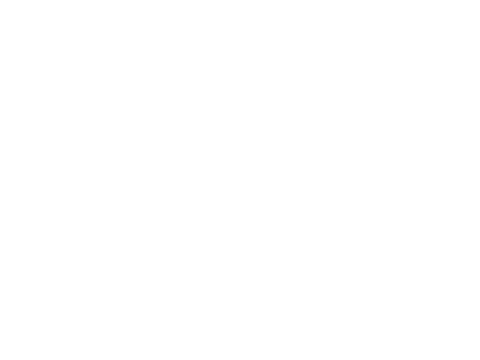

     animalid cohort                                         datasource  \
4292     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4292  20150512  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y-10', 0.8), ('Blob_N2_y-40', 0.782608695652174), ('Blob_N2_y-15', 0.8), ('Blob_N1_y0', 0.625), ('Blob_N2_y-55', 0.6666666666666666), ('Blob_N1_y-20', 1.0), ('Blob_N2_y-50', 0.7692307692307693), ('Blob_N2_y-35', 0.7894736842105263), ('Blob_N1_y-40', 0.7272727272727273), ('Blob_N2_y-30', 0.8181818181818182), ('Blob_N2_y-25', 0.75), ('Blob_N1_y-35', 0.6), ('Blob_N1_y-10', 0.4444444444444444), ('Blob_N2_y-20', 0.8333333333333334), ('Blob_N1_y-15', 0.8), ('Blob_N1_y-30', 0.7333333333333333), ('Blob_N1_y-55', 0.5714285714285714), ('Blob_N1_y-50', 0.3684210526315789), ('Blob_N1_y-25', 0.7), ('Blob_N1_y-45', 0.5

<IPython.core.display.Javascript object>


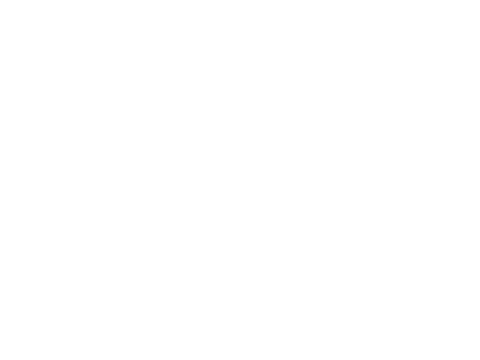

     animalid cohort                                         datasource  \
4293     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4293  20150513  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y-35', 0.9), ('Blob_N1_y-20', 1.0), ('Blob_N1_y-45', 0.6538461538461539), ('Blob_N1_y-35', 0.5714285714285714), ('Blob_N1_y-50', 0.6), ('Blob_N2_y-25', 0.6666666666666666), ('Blob_N2_y-20', 0.5), ('Blob_N1_y-15', 1.0), ('Blob_N1_y-30', 0.5454545454545454), ('Blob_N2_y-15', 1.0), ('Blob_N2_y-55', 0.717948717948718), ('Blob_N2_y-30', 0.7333333333333333), ('Blob_N2_y-50', 0.8529411764705882), ('Blob_N2_y-40', 0.8571428571428571), ('Blob_N1_y-25', 0.5), ('Blob_N1_y-40', 0.3333333333333333), ('Blob_N1_y-55', 0.574468085106383), ('Blob_N2_y-45', 0.76), ('Blob_N1_y-60', 0.5952380952380952), ('Blob_N2_y-60', 0.78

<IPython.core.display.Javascript object>


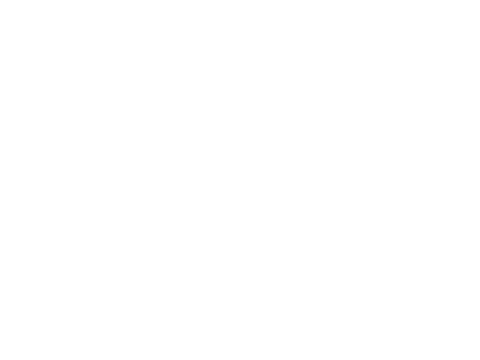

     animalid cohort                                         datasource  \
4294     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4294  20150519  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y-35', 0.7142857142857143), ('Blob_N1_y-20', 0.5), ('Blob_N1_y-45', 0.5714285714285714), ('Blob_N1_y-35', 0.8), ('Blob_N1_y-50', 0.5853658536585366), ('Blob_N2_y-25', 0.5), ('Blob_N1_y-55', 0.42424242424242425), ('Blob_N1_y-15', 0.3333333333333333), ('Blob_N2_y-20', 0.75), ('Blob_N2_y-55', 0.8888888888888888), ('Blob_N2_y-30', 0.75), ('Blob_N2_y-10', 1.0), ('Blob_N2_y-50', 0.7631578947368421), ('Blob_N2_y-40', 0.6), ('Blob_N1_y-25', 0.2857142857142857), ('Blob_N1_y-40', 0.6), ('Blob_N1_y-30', 0.5), ('Blob_N2_y-45', 0.9230769230769231), ('Blob_N1_y-60', 0.5454545454545454), ('Blob_N2_y-60', 0.8095238095238

<IPython.core.display.Javascript object>


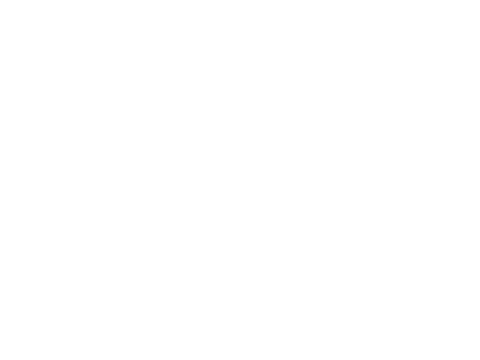

     animalid cohort                                         datasource  \
4295     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4295  20150602  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y-10', 1.0), ('Blob_N2_y-40', 0.8333333333333334), ('Blob_N2_y-15', 1.0), ('Blob_N2_y-55', 0.7285714285714285), ('Blob_N2_y-30', 0.75), ('Blob_N2_y0', 1.0), ('Blob_N2_y-35', 1.0), ('Blob_N1_y-60', 0.6290322580645161), ('Blob_N1_y-40', 0.6666666666666666), ('Blob_N2_y-25', 0.8), ('Blob_N2_y-45', 0.8695652173913043), ('Blob_N1_y-35', 0.4444444444444444), ('Blob_N1_y-10', 0.0), ('Blob_N2_y-20', 1.0), ('Blob_N1_y-30', 0.3), ('Blob_N1_y-55', 0.49019607843137253), ('Blob_N1_y-50', 0.45714285714285713), ('Blob_N1_y-25', 0.5), ('Blob_N2_y-60', 0.6730769230769231), ('Blob_N1_y-45', 0.4), ('Blob_N1_y-20', 1.0), ('B

<IPython.core.display.Javascript object>


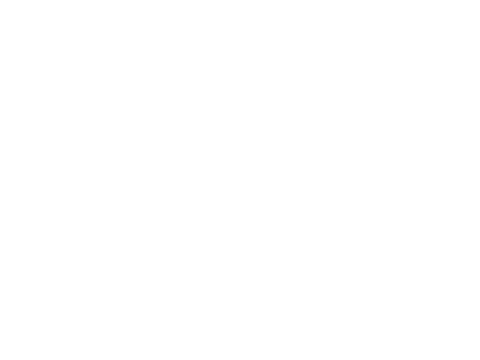

     animalid cohort                                         datasource  \
4296     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4296  20150603  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y-40', 0.7391304347826086), ('Blob_N2_y-15', 1.0), ('Blob_N2_y-55', 0.6956521739130435), ('Blob_N2_y-30', 0.7), ('Blob_N2_y0', 1.0), ('Blob_N2_y-35', 0.7692307692307693), ('Blob_N1_y-60', 0.4358974358974359), ('Blob_N1_y-40', 0.44), ('Blob_N2_y-25', 1.0), ('Blob_N2_y-45', 0.6774193548387096), ('Blob_N1_y-35', 0.47368421052631576), ('Blob_N2_y-20', 0.6), ('Blob_N1_y-15', 1.0), ('Blob_N1_y-30', 0.6428571428571429), ('Blob_N1_y-55', 0.5588235294117647), ('Blob_N1_y-50', 0.45), ('Blob_N1_y-25', 0.42857142857142855), ('Blob_N2_y-60', 0.6666666666666666), ('Blob_N1_y-45', 0.47058823529411764), ('Blob_N1_y-20', 

<IPython.core.display.Javascript object>


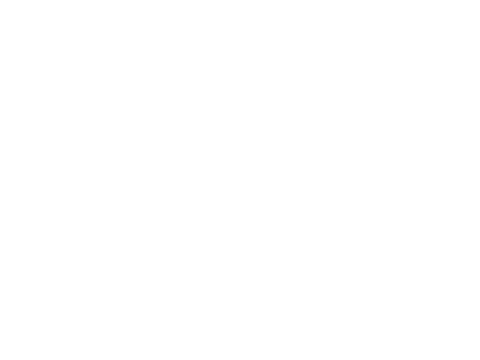

     animalid cohort                                         datasource  \
4297     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4297  20150604  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y-10', 0.6666666666666666), ('Blob_N2_y-40', 0.7450980392156863), ('Blob_N2_y-15', 0.8), ('Blob_N2_y-55', 0.7368421052631579), ('Blob_N1_y-20', 1.0), ('Blob_N1_y-40', 0.4358974358974359), ('Blob_N2_y-35', 0.8275862068965517), ('Blob_N1_y-60', 0.6), ('Blob_N2_y-30', 0.7777777777777778), ('Blob_N2_y-25', 0.7142857142857143), ('Blob_N1_y-35', 0.25806451612903225), ('Blob_N1_y-10', 0.5), ('Blob_N2_y-20', 0.6666666666666666), ('Blob_N1_y-15', 0.6666666666666666), ('Blob_N1_y-30', 0.6190476190476191), ('Blob_N1_y-55', 0.3684210526315789), ('Blob_N1_y-50', 0.4888888888888889), ('Blob_N1_y-25', 0.4444444444444444

<IPython.core.display.Javascript object>


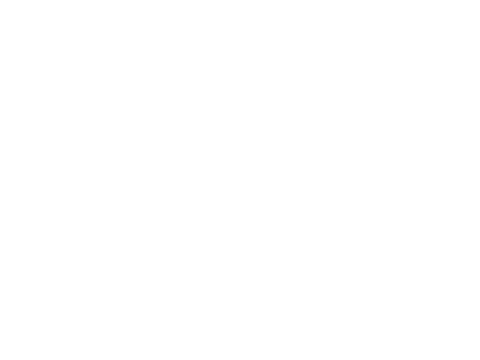

     animalid cohort                                         datasource  \
4298     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4298  20150608  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.8181818181818182), ('Blob_N2_y45', 0.8095238095238095), ('Blob_N1_y45', 0.18181818181818182), ('Blob_N1_y60', 0.2727272727272727), ('Blob_N2_y60', 0.8571428571428571), ('Blob_N1_y-30', 0.2727272727272727), ('Blob_N1_y-15', 0.42857142857142855), ('Blob_N1_y0', 0.3969465648854962), ('Blob_N2_y30', 0.7272727272727273), ('Blob_N1_y-45', 0.5714285714285714), ('Blob_N2_y-45', 0.8636363636363636), ('Blob_N2_y0', 0.8692307692307693), ('Blob_N1_y30', 0.3181818181818182), ('Blob_N2_y-60', 0.8636363636363636), ('Blob_N1_y15', 0.36363636363636365), ('Blob_N2_y-15', 0.7619047619047619), ('Blob_N1_y-60', 0.3), 

<IPython.core.display.Javascript object>


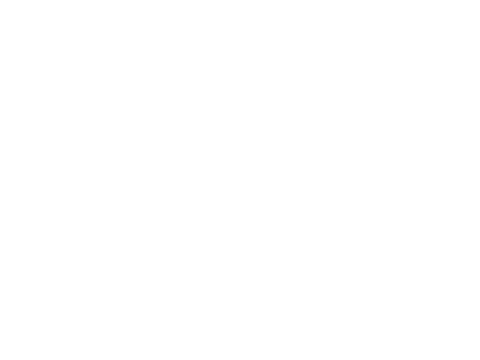

     animalid cohort                                         datasource  \
4299     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4299  20150609  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.8518518518518519), ('Blob_N2_y45', 0.7407407407407407), ('Blob_N1_y45', 0.5357142857142857), ('Blob_N1_y60', 0.5555555555555556), ('Blob_N2_y60', 0.8148148148148148), ('Blob_N1_y-30', 0.5925925925925926), ('Blob_N1_y-15', 0.48148148148148145), ('Blob_N1_y0', 0.453416149068323), ('Blob_N2_y30', 0.8148148148148148), ('Blob_N1_y-45', 0.3333333333333333), ('Blob_N2_y-45', 0.8214285714285714), ('Blob_N2_y0', 0.7962962962962963), ('Blob_N1_y30', 0.6666666666666666), ('Blob_N2_y-60', 0.8888888888888888), ('Blob_N1_y15', 0.3333333333333333), ('Blob_N2_y-15', 0.7407407407407407), ('Blob_N1_y-60', 0.4814814

<IPython.core.display.Javascript object>


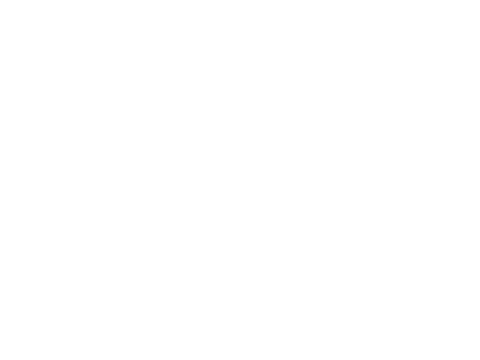

     animalid cohort                                         datasource  \
4300     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4300  20150610  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.967741935483871), ('Blob_N2_y45', 0.9), ('Blob_N1_y45', 0.4375), ('Blob_N1_y60', 0.375), ('Blob_N2_y60', 0.875), ('Blob_N1_y-30', 0.34375), ('Blob_N1_y-15', 0.25), ('Blob_N1_y0', 0.3155080213903743), ('Blob_N2_y30', 0.8064516129032258), ('Blob_N1_y-45', 0.28125), ('Blob_N2_y-45', 0.8125), ('Blob_N2_y0', 0.8351063829787234), ('Blob_N1_y30', 0.3225806451612903), ('Blob_N2_y-60', 0.8709677419354839), ('Blob_N1_y15', 0.40625), ('Blob_N2_y-15', 0.7096774193548387), ('Blob_N1_y-60', 0.3333333333333333), ('Blob_N2_y-30', 0.7666666666666667)]


<IPython.core.display.Javascript object>


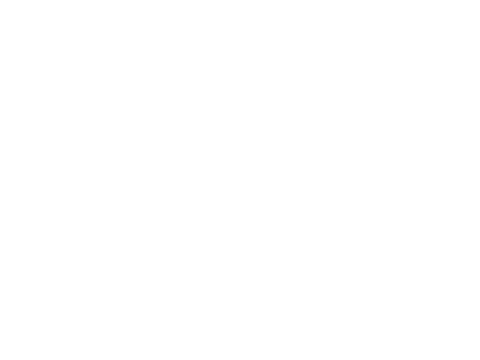

     animalid cohort                                         datasource  \
4301     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4301  20150611  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.90625), ('Blob_N2_y45', 0.8064516129032258), ('Blob_N1_y45', 0.25), ('Blob_N1_y60', 0.375), ('Blob_N2_y60', 0.96875), ('Blob_N1_y-30', 0.34375), ('Blob_N1_y-15', 0.5161290322580645), ('Blob_N1_y0', 0.2916666666666667), ('Blob_N2_y30', 0.78125), ('Blob_N1_y-45', 0.34375), ('Blob_N2_y-45', 0.875), ('Blob_N2_y0', 0.8497409326424871), ('Blob_N1_y30', 0.25), ('Blob_N2_y-60', 0.9375), ('Blob_N1_y15', 0.34375), ('Blob_N2_y-15', 0.90625), ('Blob_N1_y-60', 0.21875), ('Blob_N2_y-30', 0.8125)]


<IPython.core.display.Javascript object>


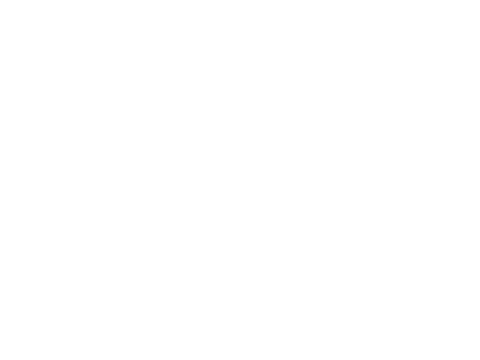

     animalid cohort                                         datasource  \
4302     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4302  20150612  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.8846153846153846), ('Blob_N2_y45', 0.7692307692307693), ('Blob_N1_y45', 0.5384615384615384), ('Blob_N1_y60', 0.5), ('Blob_N2_y60', 0.6538461538461539), ('Blob_N1_y-30', 0.4230769230769231), ('Blob_N1_y-15', 0.38461538461538464), ('Blob_N1_y0', 0.34415584415584416), ('Blob_N2_y30', 0.8846153846153846), ('Blob_N1_y-45', 0.3076923076923077), ('Blob_N2_y-45', 0.88), ('Blob_N2_y0', 0.881578947368421), ('Blob_N1_y30', 0.34615384615384615), ('Blob_N2_y-60', 0.7692307692307693), ('Blob_N1_y15', 0.5), ('Blob_N2_y-15', 0.8461538461538461), ('Blob_N1_y-60', 0.3076923076923077), ('Blob_N2_y-30', 0.84)]


<IPython.core.display.Javascript object>


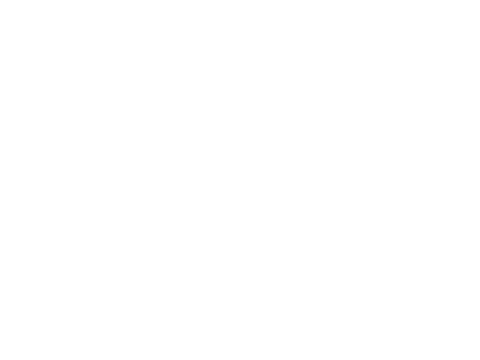

     animalid cohort                                         datasource  \
4303     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4303  20150616  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.875), ('Blob_N2_y45', 0.9130434782608695), ('Blob_N1_y45', 0.21739130434782608), ('Blob_N1_y60', 0.34782608695652173), ('Blob_N2_y60', 0.8260869565217391), ('Blob_N1_y-30', 0.34782608695652173), ('Blob_N1_y-15', 0.25), ('Blob_N1_y0', 0.35), ('Blob_N2_y30', 0.8695652173913043), ('Blob_N1_y-45', 0.43478260869565216), ('Blob_N2_y-45', 0.8260869565217391), ('Blob_N2_y0', 0.8992805755395683), ('Blob_N1_y30', 0.34782608695652173), ('Blob_N2_y-60', 0.9166666666666666), ('Blob_N1_y15', 0.25), ('Blob_N2_y-15', 0.9130434782608695), ('Blob_N1_y-60', 0.391304347826087), ('Blob_N2_y-30', 0.8695652173913043)]


<IPython.core.display.Javascript object>


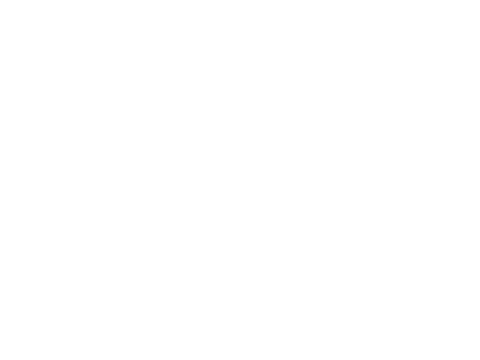

     animalid cohort                                         datasource  \
4304     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4304  20150617  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.9333333333333333), ('Blob_N2_y45', 0.8666666666666667), ('Blob_N1_y45', 0.4666666666666667), ('Blob_N1_y60', 0.5666666666666667), ('Blob_N2_y60', 0.8), ('Blob_N1_y-30', 0.5333333333333333), ('Blob_N1_y-15', 0.5333333333333333), ('Blob_N1_y0', 0.5), ('Blob_N2_y30', 0.8333333333333334), ('Blob_N1_y-45', 0.5483870967741935), ('Blob_N2_y-45', 0.7586206896551724), ('Blob_N2_y0', 0.8314606741573034), ('Blob_N1_y30', 0.4666666666666667), ('Blob_N2_y-60', 0.9), ('Blob_N1_y15', 0.7241379310344828), ('Blob_N2_y-15', 0.8), ('Blob_N1_y-60', 0.4), ('Blob_N2_y-30', 0.7741935483870968)]


<IPython.core.display.Javascript object>


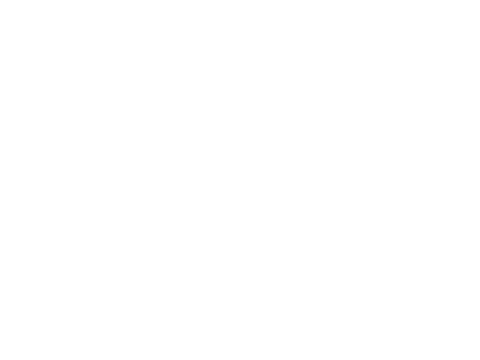

     animalid cohort                                         datasource  \
4305     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4305  20150622  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 1.0), ('Blob_N2_y45', 0.8), ('Blob_N1_y45', 0.4), ('Blob_N1_y60', 0.35), ('Blob_N2_y60', 0.9), ('Blob_N1_y-30', 0.5), ('Blob_N1_y-15', 0.4), ('Blob_N1_y0', 0.4369747899159664), ('Blob_N2_y30', 0.9523809523809523), ('Blob_N1_y-45', 0.5), ('Blob_N2_y-45', 0.8), ('Blob_N2_y0', 0.8852459016393442), ('Blob_N1_y30', 0.45), ('Blob_N2_y-60', 0.8), ('Blob_N1_y15', 0.2857142857142857), ('Blob_N2_y-15', 0.8571428571428571), ('Blob_N1_y-60', 0.5714285714285714), ('Blob_N2_y-30', 0.85)]


<IPython.core.display.Javascript object>


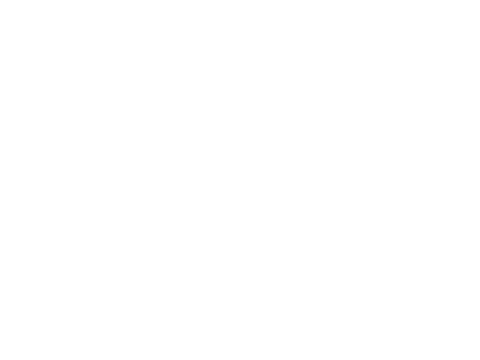

     animalid cohort                                         datasource  \
4306     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4306  20150625  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.8064516129032258), ('Blob_N2_y45', 0.8064516129032258), ('Blob_N1_y45', 0.6451612903225806), ('Blob_N1_y60', 0.5806451612903226), ('Blob_N2_y60', 0.8125), ('Blob_N1_y-30', 0.5), ('Blob_N1_y-15', 0.40625), ('Blob_N1_y0', 0.4631578947368421), ('Blob_N2_y30', 0.8387096774193549), ('Blob_N1_y-45', 0.46875), ('Blob_N2_y-45', 0.8387096774193549), ('Blob_N2_y0', 0.8031914893617021), ('Blob_N1_y30', 0.3870967741935484), ('Blob_N2_y-60', 0.75), ('Blob_N1_y15', 0.6875), ('Blob_N2_y-15', 0.78125), ('Blob_N1_y-60', 0.53125), ('Blob_N2_y-30', 0.84375)]


<IPython.core.display.Javascript object>


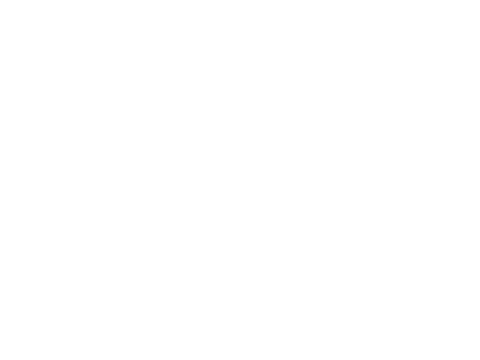

     animalid cohort                                         datasource  \
4307     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4307  20150626  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.7333333333333333), ('Blob_N2_y45', 0.8), ('Blob_N1_y45', 0.5666666666666667), ('Blob_N1_y60', 0.6), ('Blob_N2_y60', 0.8), ('Blob_N1_y-30', 0.5333333333333333), ('Blob_N1_y-15', 0.6), ('Blob_N1_y0', 0.5388888888888889), ('Blob_N2_y30', 0.8666666666666667), ('Blob_N1_y-45', 0.5666666666666667), ('Blob_N2_y-45', 0.7333333333333333), ('Blob_N2_y0', 0.8156424581005587), ('Blob_N1_y30', 0.7333333333333333), ('Blob_N2_y-60', 0.8333333333333334), ('Blob_N1_y15', 0.6), ('Blob_N2_y-15', 0.7666666666666667), ('Blob_N1_y-60', 0.6333333333333333), ('Blob_N2_y-30', 0.8333333333333334)]


<IPython.core.display.Javascript object>


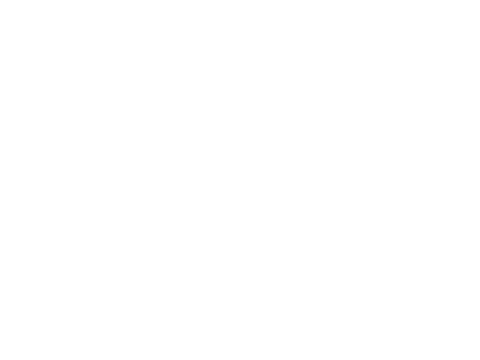

     animalid cohort                                         datasource  \
4308     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4308  20150707  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.8461538461538461), ('Blob_N2_y45', 0.84), ('Blob_N1_y45', 0.4), ('Blob_N1_y60', 0.4), ('Blob_N2_y60', 0.7692307692307693), ('Blob_N1_y-30', 0.28), ('Blob_N1_y-15', 0.38461538461538464), ('Blob_N1_y0', 0.3116883116883117), ('Blob_N2_y30', 0.88), ('Blob_N1_y-45', 0.36), ('Blob_N2_y-45', 0.72), ('Blob_N2_y0', 0.8758169934640523), ('Blob_N1_y30', 0.4230769230769231), ('Blob_N2_y-60', 0.8076923076923077), ('Blob_N1_y15', 0.48), ('Blob_N2_y-15', 0.8), ('Blob_N1_y-60', 0.4), ('Blob_N2_y-30', 0.72)]


<IPython.core.display.Javascript object>


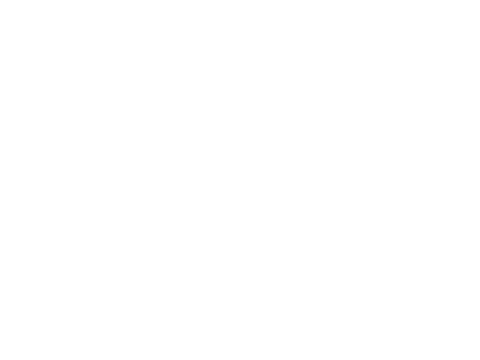

     animalid cohort                                         datasource  \
4309     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4309  20150708  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.896551724137931), ('Blob_N2_y45', 0.8214285714285714), ('Blob_N1_y45', 0.5357142857142857), ('Blob_N1_y60', 0.5172413793103449), ('Blob_N2_y60', 0.8928571428571429), ('Blob_N1_y-30', 0.5357142857142857), ('Blob_N1_y-15', 0.6428571428571429), ('Blob_N1_y0', 0.5174418604651163), ('Blob_N2_y30', 0.896551724137931), ('Blob_N1_y-45', 0.4642857142857143), ('Blob_N2_y-45', 0.7857142857142857), ('Blob_N2_y0', 0.8875739644970414), ('Blob_N1_y30', 0.5517241379310345), ('Blob_N2_y-60', 0.9655172413793104), ('Blob_N1_y15', 0.5), ('Blob_N2_y-15', 0.7931034482758621), ('Blob_N1_y-60', 0.6071428571428571), ('Blo

<IPython.core.display.Javascript object>


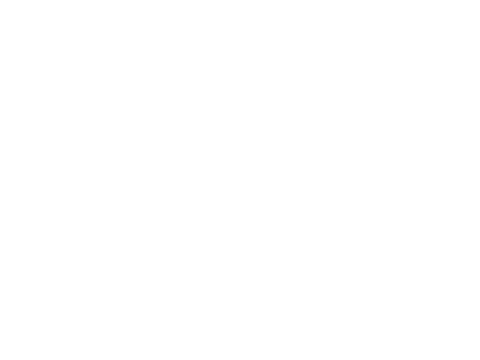

     animalid cohort                                         datasource  \
4310     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4310  20150709  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.8333333333333334), ('Blob_N2_y45', 0.6551724137931034), ('Blob_N1_y45', 0.6), ('Blob_N1_y60', 0.6), ('Blob_N2_y60', 0.8666666666666667), ('Blob_N1_y-30', 0.5), ('Blob_N1_y-15', 0.6333333333333333), ('Blob_N1_y0', 0.5111111111111111), ('Blob_N2_y30', 1.0), ('Blob_N1_y-45', 0.4666666666666667), ('Blob_N2_y-45', 0.8666666666666667), ('Blob_N2_y0', 0.7944444444444444), ('Blob_N1_y30', 0.8), ('Blob_N2_y-60', 0.7333333333333333), ('Blob_N1_y15', 0.5333333333333333), ('Blob_N2_y-15', 0.9666666666666667), ('Blob_N1_y-60', 0.6666666666666666), ('Blob_N2_y-30', 0.8709677419354839)]


<IPython.core.display.Javascript object>


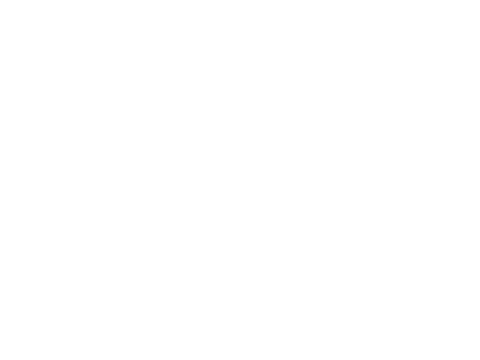

     animalid cohort                                         datasource  \
4311     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4311  20150710  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.8275862068965517), ('Blob_N2_y45', 0.8275862068965517), ('Blob_N1_y45', 0.4482758620689655), ('Blob_N1_y60', 0.6206896551724138), ('Blob_N2_y60', 0.8275862068965517), ('Blob_N1_y-30', 0.5862068965517241), ('Blob_N1_y-15', 0.7857142857142857), ('Blob_N1_y0', 0.5406976744186046), ('Blob_N2_y30', 0.8928571428571429), ('Blob_N1_y-45', 0.42857142857142855), ('Blob_N2_y-45', 0.7241379310344828), ('Blob_N2_y0', 0.8411764705882353), ('Blob_N1_y30', 0.6206896551724138), ('Blob_N2_y-60', 0.8214285714285714), ('Blob_N1_y15', 0.5862068965517241), ('Blob_N2_y-15', 0.7857142857142857), ('Blob_N1_y-60', 0.5), ('

<IPython.core.display.Javascript object>


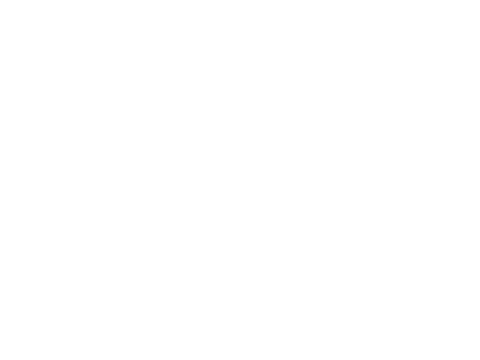

     animalid cohort                                         datasource  \
4312     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4312  20150713  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.8), ('Blob_N2_y45', 0.9), ('Blob_N1_y45', 0.47619047619047616), ('Blob_N1_y60', 0.65), ('Blob_N2_y60', 0.85), ('Blob_N1_y-30', 0.55), ('Blob_N1_y-15', 0.42857142857142855), ('Blob_N1_y0', 0.55), ('Blob_N2_y30', 0.8), ('Blob_N1_y-45', 0.5), ('Blob_N2_y-45', 0.7619047619047619), ('Blob_N2_y0', 0.7916666666666666), ('Blob_N1_y30', 0.65), ('Blob_N2_y-60', 0.8), ('Blob_N1_y15', 0.6190476190476191), ('Blob_N2_y-15', 0.9), ('Blob_N1_y-60', 0.5714285714285714), ('Blob_N2_y-30', 0.75)]


<IPython.core.display.Javascript object>


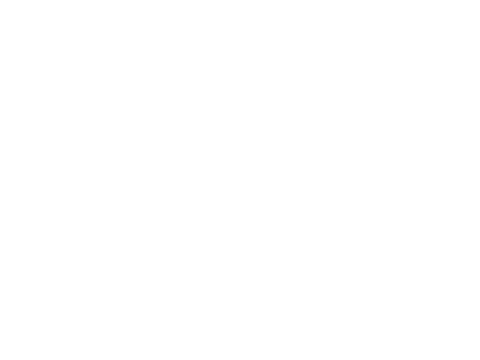

     animalid cohort                                         datasource  \
4313     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4313  20150714  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.7878787878787878), ('Blob_N2_y45', 0.9393939393939394), ('Blob_N1_y45', 0.5151515151515151), ('Blob_N1_y60', 0.5757575757575758), ('Blob_N2_y60', 0.7575757575757576), ('Blob_N1_y-30', 0.5757575757575758), ('Blob_N1_y-15', 0.3939393939393939), ('Blob_N1_y0', 0.48), ('Blob_N2_y30', 0.8181818181818182), ('Blob_N1_y-45', 0.48484848484848486), ('Blob_N2_y-45', 0.7272727272727273), ('Blob_N2_y0', 0.8190954773869347), ('Blob_N1_y30', 0.5151515151515151), ('Blob_N2_y-60', 0.7878787878787878), ('Blob_N1_y15', 0.6060606060606061), ('Blob_N2_y-15', 0.8484848484848485), ('Blob_N1_y-60', 0.48484848484848486), 

<IPython.core.display.Javascript object>


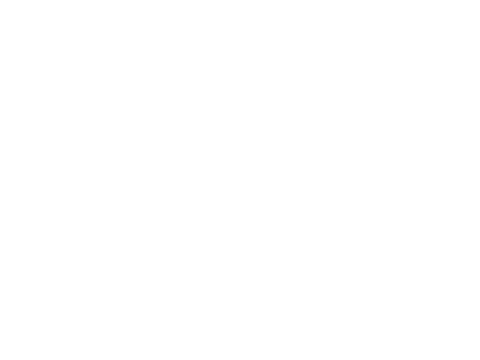

     animalid cohort                                         datasource  \
4314     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4314  20150715  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.8275862068965517), ('Blob_N2_y45', 0.7931034482758621), ('Blob_N1_y45', 0.5862068965517241), ('Blob_N1_y60', 0.6551724137931034), ('Blob_N2_y60', 0.8275862068965517), ('Blob_N1_y-30', 0.5172413793103449), ('Blob_N1_y-15', 0.4482758620689655), ('Blob_N1_y0', 0.4942528735632184), ('Blob_N2_y30', 0.8620689655172413), ('Blob_N1_y-45', 0.5862068965517241), ('Blob_N2_y-45', 0.7931034482758621), ('Blob_N2_y0', 0.8448275862068966), ('Blob_N1_y30', 0.7241379310344828), ('Blob_N2_y-60', 0.8275862068965517), ('Blob_N1_y15', 0.4482758620689655), ('Blob_N2_y-15', 0.8275862068965517), ('Blob_N1_y-60', 0.5), ('B

<IPython.core.display.Javascript object>


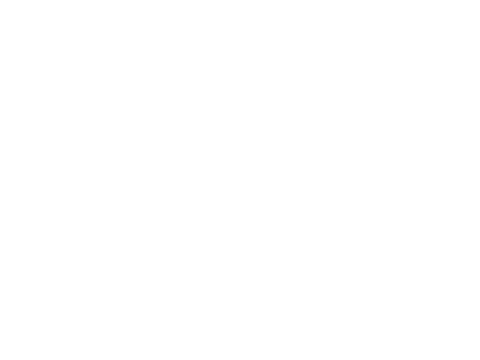

     animalid cohort                                         datasource  \
4315     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4315  20150716  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.8888888888888888), ('Blob_N2_y45', 0.9285714285714286), ('Blob_N1_y45', 0.8214285714285714), ('Blob_N1_y60', 0.6666666666666666), ('Blob_N2_y60', 0.9629629629629629), ('Blob_N1_y-30', 0.5714285714285714), ('Blob_N1_y-15', 0.48148148148148145), ('Blob_N1_y0', 0.5740740740740741), ('Blob_N2_y30', 0.9259259259259259), ('Blob_N1_y-45', 0.6153846153846154), ('Blob_N2_y-45', 0.8928571428571429), ('Blob_N2_y0', 0.8159509202453987), ('Blob_N1_y30', 0.6296296296296297), ('Blob_N2_y-60', 0.7777777777777778), ('Blob_N1_y15', 0.5357142857142857), ('Blob_N2_y-15', 1.0), ('Blob_N1_y-60', 0.48148148148148145), (

<IPython.core.display.Javascript object>


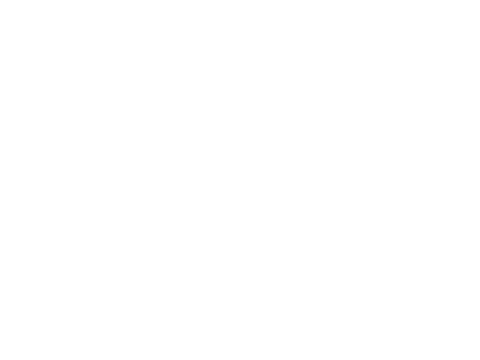

     animalid cohort                                         datasource  \
4316     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4316  20150721  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
... loading existing parsed session file
... plotting some stats...
... Plotting stats by transform ...
[('Blob_N2_y15', 0.9545454545454546), ('Blob_N2_y45', 0.8095238095238095), ('Blob_N1_y45', 0.7272727272727273), ('Blob_N1_y60', 0.6818181818181818), ('Blob_N2_y60', 0.9090909090909091), ('Blob_N1_y-30', 0.6818181818181818), ('Blob_N1_y-15', 0.7272727272727273), ('Blob_N1_y0', 0.5348837209302325), ('Blob_N2_y30', 0.8636363636363636), ('Blob_N1_y-45', 0.5454545454545454), ('Blob_N2_y-45', 0.7727272727272727), ('Blob_N2_y0', 0.7954545454545454), ('Blob_N1_y30', 0.7272727272727273), ('Blob_N2_y-60', 0.9090909090909091), ('Blob_N1_y15', 0.6190476190476191), ('Blob_N2_y-15', 0.8095238095238095), ('Blob_N1_y-60', 0.7727272

<IPython.core.display.Javascript object>


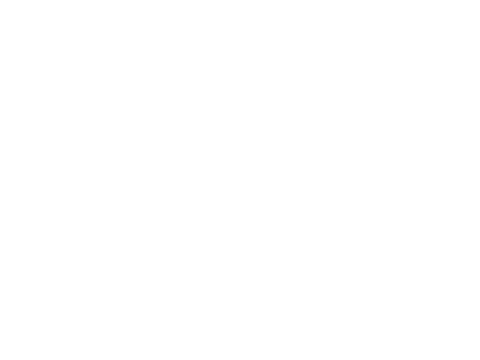

     animalid cohort                                         datasource  \
4317     AG10     AG  /n/coxfs01/behavior-data/threeport/cohort_data...   

       session  
4317  20150722  
Saving processed output to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed
***** Parsing trials *****


In [ ]:
# cohort = 'AG'
# animalid = 'AG2'
# session_meta = metadata[metadata.animalid==animalid].copy()


for (cohort, animalid), session_meta in metadata.groupby(['cohort', 'animalid']):

    print("***********************************************")
    print("ANIMAL:  %s" % animalid)
    print("***********************************************")

    # Get current animal session info:
    A = pb.Animal(animalid=animalid, experiment=paradigm) #, output_datadir=output_datadir)
    curr_processed_dir = os.path.join(root, paradigm, 'cohort_data', cohort, 'processed')

    # --- Create or load animal datafile:
    animal_datafile = os.path.join(curr_processed_dir, 'data', '%s.pkl' % animalid)
    print("outfile: %s" % animal_datafile)

    # --- Check if processed file exists -- load or create new.
    create_new = False
    if os.path.exists(animal_datafile):
        try:
            with open(animal_datafile, 'rb') as f:
                A = pkl.load(f)   
        except EOFError:
            create_new = True
    print(create_new)

    # --- Process new datafiles / sessions:
    all_sessions = metadata[metadata.animalid==animalid]['session'].values
    old_sessions = [int(skey) for skey, sobject in A.sessions.items() if sobject is not None]
    print("[%s]: Found %i processed sessions." % (animalid, len(old_sessions)))
    new_sessions = [s for s in all_sessions if s not in old_sessions]
    print("[%s]: There are %i out of %i found session datafiles to process." % (A.animalid, len(new_sessions), len(all_sessions)))

    # Process all new sessions:
    #session_meta = metadata[(metadata.animalid==animalid)] # & (metadata.session==session)]
    processed_sessions = pb.process_sessions_mp(new_sessions, session_meta,
                                             #dst_dir=output_figdir,
                                             nprocesses=1,
                                             ignore_flags=ignore_flags,
                                             response_types=response_types,
                                             outcome_types=outcome_types, create_new=False)

    # Update animal sessions dict:
    for datestr, S in processed_sessions.items():
        A.sessions.update({datestr: S})

    # Save to disk:
    try:
        with open(animal_datafile, 'wb') as f:
            pkl.dump(A, f, protocol=pkl.HIGHEST_PROTOCOL)
    except PicklingError:
        print("Unable to pkl: New sessions are not the same class as old sessions.")
        print("Reprocessing %i old sessions..." % len(processed_sessions))
        for session in old_sessions:
            curr_sessionmeta = session_meta[session_meta.session==session] #session_info[datestr]
            S = pd.process_session(curr_sessionmeta)
            A.sessions[session] = S

        with open(animal_datafile, 'wb') as f:
            pkl.dump(A, f, protocol=pkl.HIGHEST_PROTOCOL)

    print("[%s] ~~~ processing complete! ~~~" % A.animalid)

    print("-- making dataframe--")
    d_fname = 'df_%s' % A.animalid
    d_outfile = os.path.join(outdir, '%s.pkl' % d_fname)
    print(d_outfile)

    dflist = []
    no_trials = []
    for sess, s in A.sessions.items():
        if s is None:
            no_trials.append(s)
            continue
        tmpd=[]
        if s.trials is None:
            no_trials.append(sess)
            continue
        for ti, trial in enumerate(s.trials):
            currvalues = dict((k, 0) for k in event_names)
            got_keys = [k for k, v in trial.items() if k in event_names]
            for k in got_keys:
                if isinstance(trial[k], tuple): #len(trial[k])>1:
                    currvalues[k] = '_'.join([str(i) for i in trial[k]])
                else:
                    currvalues[k] = trial[k]
            tmpd.append(pd.DataFrame(currvalues, index=[ti]))
        if len(tmpd)==0:
            no_trials.append(sess)
            continue
        if len(tmpd) > 0:
            tmpdf = pd.concat(tmpd, axis=0)
            tmpdf['response_time'] = (tmpdf['response_time']-tmpdf['time']) / 1E6
            tmpdf['session'] = [sess for _ in np.arange(0, len(tmpd))]
            dflist.append(tmpdf)

    df = pd.concat(dflist, axis=0)
    print(df.head())
    with open(d_outfile, 'wb') as f:
        pkl.dump(df, f, protocol=pkl.HIGHEST_PROTOCOL)



In [59]:
s

In [11]:
curr_processed_dir = animal_datafile.split('/data')[0]
tmp_processed_sessions = glob.glob(os.path.join(curr_processed_dir, 'figures', 
                                                'tmp_files', 'proc_%s_*.pkl' % A.animalid))
print("Found %i processed sessions in tmp dir." % len(tmp_processed_sessions))

for tmpfile in tmp_processed_sessions:
    with open(tmpfile, 'rb') as f:
        tmpS = pkl.load(f)
    session = os.path.splitext(os.path.split(tmpfile)[-1])[0].split('_')[2]
    #print datestr
    A.sessions.update({session: tmpS})
    
# Save to disk:
try:
    with open(animal_datafile, 'wb') as f:
        pkl.dump(A, f, protocol=pkl.HIGHEST_PROTOCOL)
except PicklingError:
    print("Unable to pkl: New sessions are not the same class as old sessions.")
    print("Reprocessing %i old sessions..." % len(processed_sessions))
    for session in old_sessions:
        curr_sessionmeta = session_meta[session_meta.session==session] #session_info[datestr]
        S = pd.process_session(curr_sessionmeta)
        A.sessions[session] = S

    with open(animal_datafile, 'wb') as f:
        pkl.dump(A, f, protocol=pkl.HIGHEST_PROTOCOL)

Found 188 processed sessions in tmp dir.


In [93]:
processed_sessions

NameError: name 'processed_sessions' is not defined

In [9]:

event_names = ['depth_rotation', 'size', 'light_position', 'rotation',
               'response_time', 'outcome', 'time']


In [40]:


d_fname = 'df_%s' % A.animalid
d_outfile = os.path.join(outdir, '%s.pkl' % d_fname)
print(d_outfile)

dflist = []
no_trials = []
for sess, s in A.sessions.items():
    tmpdf=[]
    if s.trials is None:
        no_trials.append(sess)
        continue
    for ti, trial in enumerate(s.trials):
        currvalues = dict((k, 0) for k in event_names)
        got_keys = [k for k, v in trial.items() if k in event_names]
        for k in got_keys:
            if isinstance(trial[k], tuple): #len(trial[k])>1:
                currvalues[k] = '_'.join([str(i) for i in trial[k]])
            else:
                currvalues[k] = trial[k]
        tmpdf.append(pd.DataFrame(currvalues, index=[ti]))
    if len(tmpdf)==0:
        no_trials.append(sess)
        continue
        
    tmpdf = pd.concat(tmpdf, axis=0)
    tmpdf['response_time'] = (tmpdf['response_time']-tmpdf['time']) / 1E6
    
    dflist.append(tmpdf)
    
df = pd.concat(dflist, axis=0)
with open(d_outfile, 'wb') as f:
    pkl.dump(df, f, protocol=pkl.HIGHEST_PROTOCOL)
    

NameError: name 'd_outfile' is not defined

In [47]:
with open(d_outfile, 'wb') as f:
    pkl.dump(df, f, protocol=pkl.HIGHEST_PROTOCOL)
    

In [33]:
df = pd.concat(dflist, axis=0)

<IPython.core.display.Javascript object>


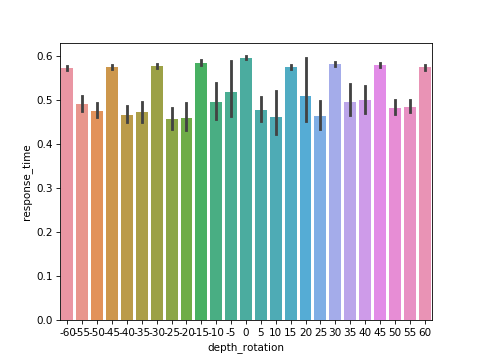

In [37]:
fig, ax = pl.subplots()
sns.barplot(x='depth_rotation', y='response_time', data=df[df['rotation']==0], ax=ax)


<IPython.core.display.Javascript object>


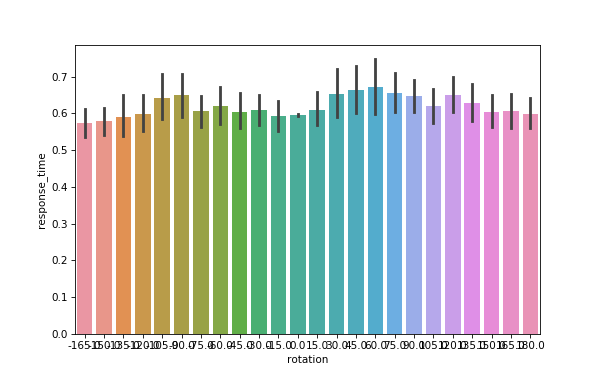

In [39]:
fig, ax = pl.subplots(figsize=(8,5))
sns.barplot(x='rotation', y='response_time', data=df[df['depth_rotation']==0], ax=ax)

In [32]:
pd.concat(dflist, axis=0).groupby(['depth_rotation', 'rotation']).mean()

response_time       size          time
depth_rotation rotation                                        
-60            -165.0         0.669915  30.000000  5.845516e+11
               -150.0         0.746063  30.000000  6.177272e+11
               -135.0         0.577676  30.000000  5.353770e+11
               -120.0         0.645125  30.000000  5.705362e+11
               -105.0         0.637439  30.000000  6.002676e+11
               -90.0          0.625523  30.000000  5.846183e+11
               -75.0          0.641546  30.000000  6.120108e+11
               -60.0          0.724523  30.000000  5.771539e+11
               -45.0          0.579239  30.000000  6.351972e+11
               -30.0          0.615269  30.000000  6.046937e+11
               -15.0          0.634215  30.000000  5.758415e+11
                0.0           0.572368  27.947511  1.034811e+12
                15.0          0.725429  30.000000  5.807550e+11
                30.0          0.637058  30.000000  5.930658e+11
                45.0          0.610820  30.000000  5.627813e+11
                60.0          0.670289  30.000000  5.780016e+11
                75.0          0.609190  30.000000  5.477338e+11
                90.0          0.598559  30.000000  5.887384e+11
                105.0         0.623734  30.000000  5.438359e+11
                120.0         0.679259  30.000000  5.801030e+11
                135.0         0.615834  30.000000  5.403255e+11
                150.0         0.626468  30.000000  5.745033e+11
                165.0         0.793805  30.000000  5.747147e+11
                180.0         0.675475  30.000000  6.057128e+11
-55             0.0           0.490717  30.000000  3.088632e+12
-50             0.0           0.475093  30.000000  3.022190e+12
-45            -165.0         0.674003  30.000000  5.505578e+11
               -150.0         0.700070  30.000000  5.884745e+11
               -135.0         0.597618  30.000000  5.667793e+11
               -120.0         0.642967  30.000000  5.710160e+11
...                                ...        ...           ...
 45             135.0         0.635710  30.000000  5.480262e+11
                150.0         0.640887  30.000000  6.199880e+11
                165.0         0.610626  30.000000  5.841285e+11
                180.0         0.633971  30.000000  5.920304e+11
 50             0.0           0.481194  30.000000  1.259689e+12
 55             0.0           0.484802  30.000000  1.227491e+12
 60            -165.0         0.682313  30.000000  5.989305e+11
               -150.0         0.687094  30.000000  5.822377e+11
               -135.0         0.724280  30.000000  5.730748e+11
               -120.0         0.742517  30.000000  5.368564e+11
               -105.0         0.601997  30.000000  5.400819e+11
               -90.0          0.692550  30.000000  5.813301e+11
               -75.0          0.652951  30.000000  5.871849e+11
               -60.0          0.754316  30.000000  5.843628e+11
               -45.0          0.666081  30.000000  5.777998e+11
               -30.0          0.672289  30.000000  5.979782e+11
               -15.0          0.630704  30.000000  6.177067e+11
                0.0           0.573751  27.958429  8.347623e+11
                15.0          0.615061  30.000000  5.646077e+11
                30.0          0.630891  30.000000  5.758601e+11
                45.0          0.605596  30.000000  5.791924e+11
                60.0          0.600554  30.000000  5.557339e+11
                75.0          0.646323  30.000000  5.466188e+11
                90.0          0.614807  30.000000  5.494788e+11
                105.0         0.610987  30.000000  5.530269e+11
                120.0         0.691262  30.000000  5.813554e+11
                135.0         0.669269  30.000000  6.000420e+11
                150.0         0.638190  30.000000  5.891690e+11
                165.0         0.669659  30.000000  5.659245e+11
                180.0         0.680170  30.000000  6.1282

In [18]:
tmpdf['response_time'] = (tmpdf['response_time']-tmpdf['time']) / 1E6

In [21]:
tmpdf.groupby(['size', 'depth_rotation'])['response_time'].mean()

size  depth_rotation
15.0  -45               0.687338
      -30               0.712479
      -15               0.677086
       0                0.752658
       30               0.613651
       45               0.652546
       60               0.669208
20.0  -45               0.545919
      -30               0.608370
      -15               0.645070
       0                0.675490
       30               0.611996
       45               0.641531
       60               0.637992
25.0  -45               0.561168
      -30               0.497129
      -15               0.604501
       0                0.659873
       30               0.564987
       45               0.545909
       60               0.560747
30.0  -45               0.566122
      -30               0.503162
      -15               0.593271
       0                0.552749
       30               0.615039
       45               0.528195
       60               0.498611
35.0  -45               0.558416
      -30             

In [14]:
#(tmpdf['response_time']-tmpdf['time']) / 1E6

## debugging space

In [26]:
import pymworks

In [27]:
# AG2_160212

SyntaxError: invalid syntax (<ipython-input-27-01ec91d1ee21>, line 1)

In [72]:
#dfn = '/n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG2_160408.mwk' 
dfn = '/n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG2_160623.mwk' 

#AG2_160623.mwk
df = pymworks.open(dfn)


In [73]:
df.get_events('#stimDisplayUpdate')

[Event[code=7, name=#stimDisplayUpdate, time=238840823956, value=[None]],
 Event[code=7, name=#stimDisplayUpdate, time=238841194962, value=[None]],
 Event[code=7, name=#stimDisplayUpdate, time=239028219139, value=[None]],
 Event[code=7, name=#stimDisplayUpdate, time=239059576030, value=[{'name': 'BlankScreen', 'color_g': 0.0, 'color_b': 0.0, 'action': 'draw', 'type': 'blankscreen', 'color_r': 0.0}, {'pos_x': 0.0, 'pos_y': 0.0, 'name': 'Blob_N1_CamRot_y60.png 2', 'filename': '/var/folders/bq/d_40rj9j1slfyy_dz1h7_7p80000gn/T/MWorks/Experiment Cache/_Users_labuser_Downloads_RatBehaviorGeneral_Behavior_3Dtransforms_2way_blobs/tmp/Blobs_TrainingRatsD1D2/Blob_N1_CamRot_y60.png', 'file_hash': '43b41be240c1fac0a4385f97f9fddf709f106f2f', 'size_x': 52.40999984741211, 'size_y': 52.40999984741211, 'action': 'draw', 'rotation': 0.0, 'type': 'image'}]],
 Event[code=7, name=#stimDisplayUpdate, time=239062091869, value=[{'name': 'BlankScreen', 'color_g': 0.0, 'color_b': 0.0, 'action': 'draw', 'type': 

In [74]:
df.get_codec()

{0: '#codec',
 1: '#systemEvent',
 2: '#components',
 3: '#termination',
 4: '#allowAltFailover',
 5: '#state_system_mode',
 6: '#announceMessage',
 7: '#stimDisplayUpdate',
 8: '#beamPosition',
 9: '#experimentLoadProgress',
 10: '#announceStimulus',
 11: '#announceSound',
 12: '#announceCalibrator',
 13: '#requestCalibrator',
 14: '#announceCurrentState',
 15: '#annouceTrial',
 16: '#announceBlock',
 17: '#announceAssertion',
 18: '#serverName',
 19: '#mainScreenInfo',
 20: '#warnOnSkippedRefresh',
 21: 'debuggerActive',
 22: 'debuggerRunning',
 23: 'debuggerStep',
 24: '#serialBridgeAddress',
 25: '#syringePumpPort',
 26: 'Adjusted_Metric_Correct_Strategy',
 27: 'GainFactorCorrectMetric',
 28: 'FlagAutomaticBiasSuppression',
 29: 'WatchResponseSide',
 30: 'WatchSuccessBias',
 31: 'Metric_Correct_Strategy',
 32: 'Metric_Biased_Strategy',
 33: 'Metric_Alternation_Strategy',
 34: 'FlagStaircaseHorizSeparation',
 35: 'WatchSuccessStair_HorizSep',
 36: 'HorizSep_stair_up_criterion',
 37:

In [79]:
if 'nofeedback_depth_rotation_min' not in df.get_codec().values():
    always_feedback = True
else:
    always_feedback = False
    no_fb_params_tmp = df.get_events(['nofeedback_size_min',
                                   'nofeedback_size_max',
                                   'nofeedback_depth_rotation_min',
                                   'nofeedback_depth_rotation_max'])
    fb_info = list(set([(e.name, e.value) for e in no_fb_params_tmp]))
    no_fb = {}
    for fb in fb_info:
        param = '_'.join(fb[0].split('_')[1:-1])
        if param not in no_fb.keys():
            no_fb[param] = [fb[1]]
        else:
            no_fb[param].append(fb[1])
no_fb

{'depth_rotation': [0.0, 0.0], 'size': [15, 15.0]}

In [85]:
import pymworks
remove_orphans=True

In [86]:
stim_blacklists = [
    lambda s: (('type' in s.keys()) and (s['type'] == 'blankscreen')),
    ]

print "***** Parsing trials *****"
df = pymworks.open(dfn)

# Separate behavior-training flag states from current trial states
if ignore_flags is None or len(ignore_flags)==0:
    codec = df.get_codec()
    ignore_flags = []
    all_flags = [f for f in codec.values() if 'Flag' in f or 'flag' in f]
    for fl in all_flags:
        evs = df.get_events(fl)
        vals = list(set([v.value for v in evs]))
        if len(vals) > 1 or len(evs) > 5:
            ignore_flags.append(fl)

# Get run bounds:
bounds = pb.get_run_time(df)
# if bounds is None:
#     return None, None, df

trials = []; flag_list = []; flags = {};
for bound in bounds:

    if (bound[1]-bound[0])/1E6 < 2.0:
        continue

    # Identify no feedback conditions
    #  231: 'nofeedback_depth_rotation_min',
    #  232: 'nofeedback_depth_rotation_max',
    #  233: 'nofeedback_size_min',
    #  234: 'nofeedback_size_max',
    if 'nofeedback_depth_rotation_min' not in df.get_codec().values():
        always_feedback = True
    else:
        always_feedback = False
        no_fb_params_tmp = df.get_events(['nofeedback_size_min',
                                       'nofeedback_size_max',
                                       'nofeedback_depth_rotation_min',
                                       'nofeedback_depth_rotation_max'])
        fb_info = list(set([(e.name, e.value) for e in no_fb_params_tmp]))
        no_fb = {}
        for fb in fb_info:
            param = '_'.join(fb[0].split('_')[1:-1])
            if param not in no_fb.keys():
                no_fb[param] = [fb[1]]
            else:
                no_fb[param].append(fb[1])

    # Get display events:
    tmp_devs = df.get_events('#stimDisplayUpdate')                     
    tmp_devs = [i for i in tmp_devs if bound[0] <= i['time']<= bound[1]] 

    # Get behavior flags:
    codec = df.get_codec()
    all_flags = [f for f in codec.values() if 'Flag' in f or 'flag' in f]
    flag_names = [f for f in all_flags if f not in ignore_flags]
    tmp_flags = dict((flag, None) for flag in flag_names)
    for flag in flag_names:
        if flag == 'FlagNoFeedbackInCurrentTrial': continue
        found_values = [e.value for e in df.get_events(flag) if bound[0] <= e.time <=bound[1]]
        if (len(found_values) > 1) or (len(list(set(found_values)))) > 1:
            print("More than 1 value found for flag: %s" % flag)
            tmp_flags[flag] = int(found_values[-1])
        elif (len(found_values) == 1) or (len(list(set(found_values)))) == 1:
            tmp_flags[flag] = int(found_values[0])
        else:
            tmp_flags.pop(flag)

    # Add current flag values to flags list:
    flag_list.append(tmp_flags)

    # Add boundary time to flag info:
    tmp_flags.update({'run_bounds': bound})

    # Check for valid response types and get all response events:
    response_types = [r for r in response_types if r in codec.values()]
    response_evs = [e for e in df.get_events(response_types) if e.value==1] #if (bound[0] < e['time'] < bound[1]) and e.value==1]    
    outcome_evs = [e for e in df.get_events(outcome_types) if e.value==1] #if (bound[0] < e['time'] < bound[1]) and e.value is not None and e.value != 0] #not in [0, None]]  
    print(len(response_evs), len(outcome_evs))

    # Sync response events to true outcome events:  response occurs before outcome, outcome is the master
    outcome_key = 'response'
    responses = pb.to_trials(tmp_devs, response_evs, outcome_key=outcome_key,
                                               duration_multiplier=1.,
                                               stim_blacklists=stim_blacklists,
                                               remove_unknown=True)

    outcomes = pymworks.events.utils.sync(outcome_evs, responses, direction=1, mkey=lambda x: x['response_time'])

    print "N total response events: ", len(responses)
    print "N total outcome events: ", len(outcomes)

    assert len(responses) == len(outcomes), "**ERROR:  N responses (%i) != N outcomes (%i)" % (len(responses), len(outcomes))
    tmp_trials = copy.copy(responses)
    for trial_ix, (response, outcome) in enumerate(zip(responses, outcomes)):
        if outcome is not None:
            tmp_trials[trial_ix].update({'outcome': outcome.name, 'outcome_time': outcome.time}) #['outcome']})
        else:
            tmp_trials[trial_ix].update({'outcome': 'unknown'})

    # Get rid of display events without known outcome within 'duration_multiplier' time
    if remove_orphans:                                                  
        orphans = [(i,x) for i,x in enumerate(tmp_trials) if\
                    x['outcome']=='unknown' or x['%s' % outcome_key]=='unknown']
        tmp_trials = [t for t in tmp_trials if not t['outcome']=='unknown']
        tmp_trials = [t for t in tmp_trials if not t['%s' % outcome_key]=='unknown']

        print "Found and removed %i orphan stimulus events in file %s" % (len(orphans), df.filename)
        print "N valid trials: %i" % len(tmp_trials)

    # Add current trials in chunk to trials list:
    trials.extend(tmp_trials)


***** Parsing trials *****
(944, 950)
N total response events:  938
N total outcome events:  938
Found and removed 0 orphan stimulus events in file /n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG2_160623.mwk
N valid trials: 938


In [87]:

for t in trials:
    stim_aspect = [v.value for v in df.get_events('StimAspectRatio')][-1]
    assert t['response_time'] < t['outcome_time'], "**ERROR: Mismatch in response/outcome alignment"

    # Supplement trial info
    stimname = t['name'].split(' ')[0].split('.png')[0]
    t['name'] = stimname
    # Can be: Blob_1_RotDep_0, Blob_N2_CamRot_y-45

    if 'RotDep' in stimname:
        drot_str = stimname.split('_')[-1]
        depthrot_value = int(drot_str)
        t['depth_rotation'] = depthrot_value #Blob_N2_CamRot_y-45
    elif 'CamRot' in stimname and 'LighPos' in stimname:
        depthrot_value = int(stimname.split('CamRot_y')[1].split('_')[0])
        lightpos_value = tuple([int(i) for i in re.findall("[-\d]+", stimname.split('LighPos')[1])])
        t['depth_rotation'] = depthrot_value #Blob_N2_CamRot_y-45
        t['light_position'] = lightpos_value
    elif 'CamRot' in stimname:
        depthrot_value = int(stimname.split('CamRot_y')[1].split('_')[0])
        t['depth_rotation'] = depthrot_value #Blob_N2_CamRot_y-45
    elif 'morph' in stimname:
        t['depth_rotation']=0

#         if 'y' in drot_str:
#             depthrot_value = int(drot_str[1:])
#         else:
#             depthrot_value = int(drot_str)

    t['size'] = round(t['size_x']/stim_aspect, 1)

    # Check if no feedback
    if always_feedback:
        t['no_feedback'] = True
    else:
        t['no_feedback'] = all([np.min(lims) < t[k] < np.max(lims) for k, lims in no_fb.items()])


KeyError: 'depth_rotation'

In [88]:
t

{'action': 'draw',
 'duration': 416530,
 'file_hash': 'a51f86bed16f18dfa4aadad2e0489696749d1a2c',
 'filename': '/var/folders/bq/d_40rj9j1slfyy_dz1h7_7p80000gn/T/MWorks/Experiment Cache/_Users_labuser_Downloads_RatBehaviorGeneral_Behavior_3Dtransforms_2way_blobs/tmp/morphsD1D2/morph13.png',
 'name': 'morph13',
 'outcome': 'failure',
 'outcome_time': 239069203023,
 'pos_x': 0.0,
 'pos_y': 0.0,
 'response': 'Announce_AcquirePort3',
 'response_time': 239069202703,
 'rotation': 0.0,
 'size': 40.0,
 'size_x': 69.87999725341797,
 'size_y': 69.87999725341797,
 'time': 239068806327,
 'type': 'image'}

In [89]:
stimname

'morph13'

In [33]:
stimname = 'Blob_N2_CamRot_y60_LighPos_x10_y0_z-10'


In [36]:
stimname.split('CamRot_y')[1].split('_')[0]

'60'

In [42]:
stimname.split('LighPos')[1]

['_x10_y0_z-10']

In [47]:
#re.findall(r'\d+', stimname.split('LighPos')[1])
tuple([int(i) for i in re.findall("[-\d]+", stimname.split('LighPos')[1])])


(10, 0, -10)

In [78]:
[d for d in df.get_codec().values() if 'nofeedback' in d]

['nofeedback_depth_rotation_min',
 'nofeedback_depth_rotation_max',
 'nofeedback_size_min',
 'nofeedback_size_max']

# 4. Run all animals and sessions

In [ ]:
for (cohort, animalid), session_meta in metadata[metadata['cohort']=='AG'].groupby(['cohort', 'animalid']):

    
    print("***********************************************")
    print("ANIMAL:  %s" % animalid)
    print("***********************************************")

    # Get current animal session info:
    A = pb.Animal(animalid=animalid, experiment=paradigm) #, output_datadir=output_datadir)
    curr_processed_dir = os.path.join(root, paradigm, 'cohort_data', cohort, 'processed')

    # --- Create or load animal datafile:
    animal_datafile = os.path.join(curr_processed_dir, 'data', '%s.pkl' % animalid)
    print("outfile: %s" % animal_datafile)
    
    # --- Check if processed file exists -- load or create new.
    create_new = False
    if os.path.exists(animal_datafile):
        try:
            with open(animal_datafile, 'rb') as f:
                A = pkl.load(f)   
        except EOFError:
            create_new = True

    # --- Process new datafiles / sessions:
    all_sessions = metadata[metadata.animalid==animalid]['session'].values
    old_sessions = [skey for skey, sobject in A.sessions.items() if sobject is not None]
    print("[%s]: Found %i processed sessions." % (animalid, len(old_sessions)))
    new_sessions = [s for s in all_sessions if s not in old_sessions]
    print("[%s]: There are %i out of %i found session datafiles to process." % (A.animalid, len(new_sessions), len(all_sessions)))

    # Process all new sessions:
    #session_meta = metadata[(metadata.animalid==animalid)] # & (metadata.session==session)]
    processed_sessions = pb.process_sessions_mp(new_sessions, session_meta,
                                             #dst_dir=output_figdir,
                                             nprocesses=1,
                                             ignore_flags=ignore_flags,
                                             response_types=response_types,
                                             outcome_types=outcome_types) #, create_new=True)

    # Update animal sessions dict:
    for datestr, S in processed_sessions.items():
        A.sessions.update({datestr: S})

    # Save to disk:
    try:
        with open(animal_datafile, 'wb') as f:
            pkl.dump(A, f, protocol=pkl.HIGHEST_PROTOCOL)
    except PicklingError:
        print("Unable to pkl: New sessions are not the same class as old sessions.")
        print("Reprocessing %i old sessions..." % len(processed_sessions))
        for session in old_sessions:
            curr_sessionmeta = session_meta[session_meta.session==session] #session_info[datestr]
            S = pd.process_session(curr_sessionmeta)
            A.sessions[session] = S

        with open(animal_datafile, 'wb') as f:
            pkl.dump(A, f, protocol=pkl.HIGHEST_PROTOCOL)

    print("[%s] ~~~ processing complete! ~~~" % A.animalid)

